# Heart Disease Prediction and EDA

### **Table of Contents**
* [<span style="color:#A690A4"> 0. Executive Summary](#exe_sum)
* [<span style="color:#A690A4"> 1. Introduction](#intro)
* [<span style="color:#A690A4"> 2. Collect, Wrangle & Explore Data](#process)
* [<span style="color:#A690A4"> 3. Predict Asking Price](#predict)
* [<span style="color:#A690A4"> 4. Conclusion](#conclusion)

# <span style="color:#5E6997">Executive Summary</span> <a class="anchor" id="exe_sum"></a>

# <span style="color:#5E6997">Introduction</span> <a class="anchor" id="intro"></a>

Determining which features to analyze involves focusing on their **relevance to the target variable** (`HadHeartAttack`) while considering their statistical, medical, or logical relationship. Here's how you can prioritize features for analysis and preprocessing:

---

#### 1. **Direct Medical Relevance**
   Features directly related to heart attack risk based on medical knowledge are high-priority. These include:
   - **HadAngina**: Angina is a symptom of coronary heart disease, strongly associated with heart attacks.
   - **HadStroke**: Stroke shares many risk factors with heart attacks.
   - **HadCOPD**: Chronic obstructive pulmonary disease is associated with cardiovascular issues.
   - **HadDiabetes**: Diabetes is a known risk factor for heart disease.
   - **BMI, PhysicalActivities, SmokerStatus, AlcoholDrinkers**: Lifestyle factors strongly correlated with cardiovascular health.
   - **AgeCategory, Sex**: Demographics highly predictive of heart disease.

#### 2. **Comorbid Conditions**
   Features that capture comorbidities or associated health issues:
   - **HadDepressiveDisorder**: Depression is linked to heart disease through stress and inflammation.
   - **HadKidneyDisease**: Kidney disease can contribute to heart conditions.
   - **GeneralHealth**: Self-reported health status often reflects multiple underlying conditions.

#### 3. **Behavioral and Preventive Health**
   Features that reflect health-seeking behaviors or preventive measures:
   - **LastCheckupTime**: Regular checkups may reduce heart attack risk through early intervention.
   - **FluVaxLast12, PneumoVaxEver, TetanusLast10Tdap**: Proxy for health awareness or regular healthcare access.
   - **ChestScan**: May indicate a history of lung or cardiovascular screening.

#### 4. **Disabilities and Functional Limitations**
   These features capture physical challenges that may be proxies for poor cardiovascular health:
   - **DifficultyWalking**: A strong indicator of reduced mobility, often associated with heart conditions.
   - **DifficultyConcentrating, DifficultyErrands**: Proxy for severe health or neurological issues.

#### 5. **Statistical Considerations**
   Features with significant variation or imbalance may require adjustments:
   - **State**: May add little predictive power unless there’s geographic disparity in heart attack prevalence.
   - **CovidPos**: Analyze if post-COVID complications affect heart attack risk.

#### 6. **Feature Engineering Opportunities**
   Create derived features or group similar ones:
   - Create an **Exercise Regularity** feature from `PhysicalActivities` and `SleepHours`.
   - Combine comorbidity indicators (`HadDiabetes`, `HadCOPD`, etc.) into a **Comorbidity Index**.

#### 7. **Correlation with Target Variable**
   Use a **correlation matrix** or statistical tests (e.g., chi-square for categorical variables, ANOVA for numeric variables) to identify features with the strongest relationships to `HadHeartAttack`.

#### 8. **Class Imbalance**
   Check if `HadHeartAttack` is imbalanced (e.g., many more "No" than "Yes"). If so, focus on features with strong predictive power to address the imbalance during modeling.



# <span style="color:#5E6997">Collect, Wrangle, and Explore Data</span> <a class="anchor" id="process"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings("ignore", message=".*use_inf_as_na option is deprecated.*")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd

# Load the dataset
file_path = './heart_2022_no_nans.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(df.head())

     State     Sex GeneralHealth  PhysicalHealthDays  MentalHealthDays  \
0  Alabama  Female     Very good                 4.0               0.0   
1  Alabama    Male     Very good                 0.0               0.0   
2  Alabama    Male     Very good                 0.0               0.0   
3  Alabama  Female          Fair                 5.0               0.0   
4  Alabama  Female          Good                 3.0              15.0   

                                     LastCheckupTime PhysicalActivities  \
0  Within past year (anytime less than 12 months ...                Yes   
1  Within past year (anytime less than 12 months ...                Yes   
2  Within past year (anytime less than 12 months ...                 No   
3  Within past year (anytime less than 12 months ...                Yes   
4  Within past year (anytime less than 12 months ...                Yes   

   SleepHours            RemovedTeeth HadHeartAttack  ... HeightInMeters  \
0         9.0            Non

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246022 entries, 0 to 246021
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      246022 non-null  object 
 1   Sex                        246022 non-null  object 
 2   GeneralHealth              246022 non-null  object 
 3   PhysicalHealthDays         246022 non-null  float64
 4   MentalHealthDays           246022 non-null  float64
 5   LastCheckupTime            246022 non-null  object 
 6   PhysicalActivities         246022 non-null  object 
 7   SleepHours                 246022 non-null  float64
 8   RemovedTeeth               246022 non-null  object 
 9   HadHeartAttack             246022 non-null  object 
 10  HadAngina                  246022 non-null  object 
 11  HadStroke                  246022 non-null  object 
 12  HadAsthma                  246022 non-null  object 
 13  HadSkinCancer              24

## Display Unique Values for Each Feature

In [4]:
# Iterate through each column and process based on data type
for column in df.columns:
    if df[column].dtype == 'object':  # Categorical variables
        unique_values = df[column].unique()
        print(f"Column: {column}")
        print(f"Unique Values: {unique_values}\n")
    else:  # Numeric variables
        col_min = df[column].min()
        col_max = df[column].max()
        print(f"Column: {column}")
        print(f"Range: {col_min} to {col_max}\n")

Column: State
Unique Values: ['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District of Columbia' 'Florida' 'Georgia'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Rhode Island' 'South Carolina'
 'South Dakota' 'Tennessee' 'Texas' 'Utah' 'Vermont' 'Virginia'
 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming' 'Guam' 'Puerto Rico'
 'Virgin Islands']

Column: Sex
Unique Values: ['Female' 'Male']

Column: GeneralHealth
Unique Values: ['Very good' 'Fair' 'Good' 'Excellent' 'Poor']

Column: PhysicalHealthDays
Range: 0.0 to 30.0

Column: MentalHealthDays
Range: 0.0 to 30.0

Column: LastCheckupTime
Unique Values: ['Within past year (anytime less than 12 months ago)'
 '5 or mor

## Description of Each Feature

Here’s a brief rundown of what each column in the dataset represents:

`State` - State FIPS Code\
`Sex` - Sex of Respondent\
`GeneralHealth` - Would you say that in general your health is:\
`PhysicalHealthDays` - Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good?\
`MentalHealthDays` - Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good?\
`LastCheckupTime` - About how long has it been since you last visited a doctor for a routine checkup?\
`PhysicalActivities` - During the past month, other than your regular job, did you participate in any physical activities or exercises such as running, calisthenics, golf, gardening, or walking for exercise?\
`SleepHours` - On average, how many hours of sleep do you get in a 24-hour period?\
`RemovedTeeth` - Not including teeth lost for injury or orthodontics, how many of your permanent teeth have been removed because of tooth decay or gum disease?\
`HadHeartAttack` - (Ever told) you had a heart attack, also called a myocardial infarction?\
`HadAngina` - (Ever told) (you had) angina or coronary heart disease?\
`HadStroke` - (Ever told) (you had) a stroke.\
`HadAsthma` - (Ever told) (you had) asthma?\
`HadSkinCancer` - (Ever told) (you had) skin cancer that is not melanoma?\
`HadCOPD` - (Ever told) (you had) C.O.P.D. (chronic obstructive pulmonary disease), emphysema or chronic bronchitis?\
`HadDepressiveDisorder` - (Ever told) (you had) a depressive disorder (including depression, major depression, dysthymia, or minor depression)?\
`HadKidneyDisease` - Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney disease?\
`HadArthritis` - (Ever told) (you had) some form of arthritis, rheumatoid arthritis, gout, lupus, or fibromyalgia?  (Arthritis diagnoses include: rheumatism, polymyalgia rheumatica; osteoarthritis (not osteporosis); tendonitis, bursitis, bunion, tennis elbow; carpal tunnel syndrome, tarsal tunnel syndrome; joint infection, etc.)\
`HadDiabetes` - (Ever told) (you had) diabetes?\
`DeafOrHardOfHearing` - Are you deaf or do you have serious difficulty hearing?\
`BlindOrVisionDifficulty` - Are you blind or do you have serious difficulty seeing, even when wearing glasses?\
`DifficultyConcentrating` - Because of a physical, mental, or emotional condition, do you have serious difficulty concentrating, remembering, or making decisions?\
`DifficultyWalking` - Do you have serious difficulty walking or climbing stairs?\
`DifficultyDressingBathing` - Do you have difficulty dressing or bathing?\
`DifficultyErrands` - Because of a physical, mental, or emotional condition, do you have difficulty doing errands alone such as visiting a doctor´s office or shopping?\
`SmokerStatus` - Four-level smoker status:  Everyday smoker, Someday smoker, Former smoker, Non-smoker\
`ECigaretteUsage` - Would you say you have never used e-cigarettes or other electronic vaping products in your entire life or now use them every day, use them some days, or used them in the past but do not currently use them at all?\
`ChestScan` - Have you ever had a CT or CAT scan of your chest area?\
`RaceEthnicityCategory` - Five-level race/ethnicity category\
`AgeCategory` - Fourteen-level age category\
`HeightInMeters` - Reported height in meters\
`WeightInKilograms` - Reported weight in kilograms\
`BMI` - Body Mass Index (BMI)\
`AlchoholDrinkers` - Adults who reported having had at least one drink of alcohol in the past 30 days.\
`HIVTesting` - Adults who have ever been tested for HIV\
`FluVaxLast12` - During the past 12 months, have you had either flu vaccine that was sprayed in your nose or flu shot injected into your arm?\
`PneumoVaxEver` - Have you ever had a pneumonia shot also known as a pneumococcal vaccine?\
`TetanusLast10Tdap` - Have you received a tetanus shot in the past 10 years? Was this Tdap, the tetanus shot that also has pertussis or whooping cough vaccine?\
`HighRiskLastYear` - You have injected any drug other than those prescribed for you in the past year. You have been treated for a sexually transmitted disease or STD in the past year. You have given or received money or drugs in exchange for sex in the past year.\
`CovidPos` - Has a doctor, nurse, or other health professional ever told you that you tested positive for COVID 19?


In [5]:
# TODO: 

## Define Categorical Columns

In [6]:
# Select categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

## Plot the Distribution of Unique Values for each Categorical Variable¶

Note that some graphs have been oriented horizontally to make room for their Category names.

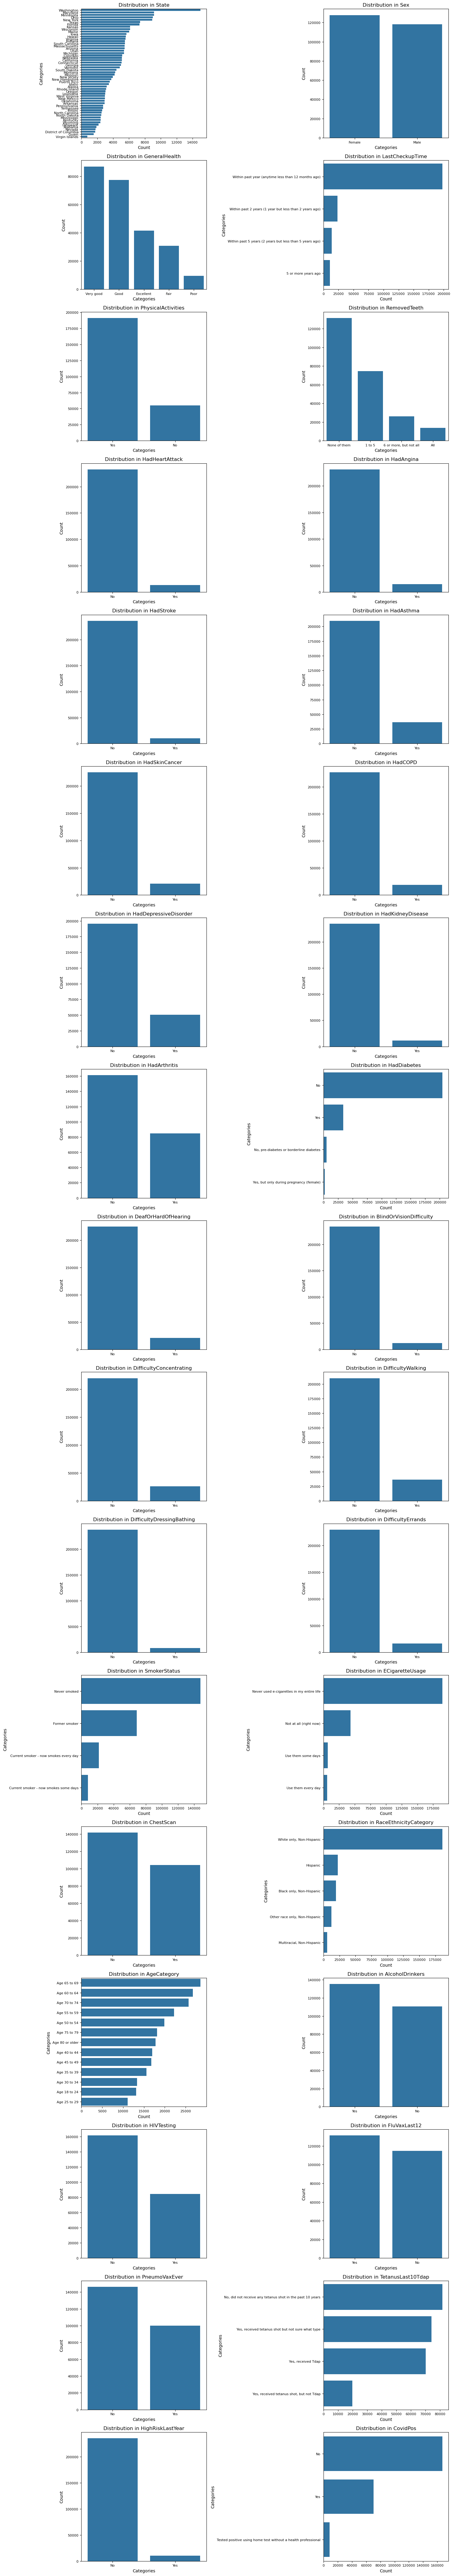

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# List of columns to orient horizontally
horizontal_columns = [
    'State', 'LastCheckupTime', 'HadDiabetes', 
    'SmokerStatus', 'ECigaretteUsage',  
    'RaceEthnicityCategory', 'AgeCategory', 'TetanusLast10Tdap', 'CovidPos'
]

# Number of columns per row for the grid
plots_per_row = 2

# Calculate the number of rows needed
num_categories = len(categorical_columns)
num_rows = math.ceil(num_categories / plots_per_row)

# Create a grid of subplots
fig, axes = plt.subplots(num_rows, plots_per_row, figsize=(15, num_rows * 5))

# Flatten axes array if more than one row, or wrap in a list if only one row
if num_rows == 1:
    axes = [axes]
else:
    axes = axes.flatten()

# Plot the distribution of unique values for each categorical variable
for idx, column in enumerate(categorical_columns):
    value_counts = df[column].value_counts()
    
    # Check if the column should be horizontal
    if column in horizontal_columns:
        sns.barplot(y=value_counts.index, x=value_counts.values, ax=axes[idx])  # Horizontal bar plot
        axes[idx].set_ylabel('Categories', fontsize=10)
        axes[idx].set_xlabel('Count', fontsize=10)
    else:
        sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[idx])  # Vertical bar plot
        axes[idx].set_xlabel('Categories', fontsize=10)
        axes[idx].set_ylabel('Count', fontsize=10)
    
    # Set title and tick sizes
    axes[idx].set_title(f'Distribution in {column}', fontsize=12)
    axes[idx].tick_params(axis='y', labelsize=8)
    axes[idx].tick_params(axis='x', labelsize=8)

# Hide unused subplots if any
for idx in range(len(categorical_columns), len(axes)):
    fig.delaxes(axes[idx])

# Adjust layout
plt.tight_layout()
plt.show()


## Categorical Feature Improvements Based on Graphs 
Improving the performance of features in the models can be achieved by addressing issues related to data quality, feature engineering, and preprocessing. Here are some specific ideas for the features:


**1. ✅ Address Imbalanced Distributions**
For features where one category dominates (e.g., health conditions like `HadHeartAttack`, `HadStroke`, `DifficultyWalking`):
- **Rebalancing Techniques:**
  - ✅ Use techniques like undersampling the majority class.
  - Assign higher class weights in models to penalize misclassification of the minority class.
- **Feature Transformation:**
  - ✅ Aggregate similar categories into a binary or reduced set of classes (e.g., combine categories in `HadDiabetes` into "Yes" vs. "No" groups).


**2. ✅ Handle Categorical Features Effectively**
To improve their predictive power:
- **Encoding Methods:**
  - ✅ Use **one-hot encoding** for nominal categories (e.g., `RaceEthnicityCategory` or `State`).
  - ✅ Apply **ordinal encoding** for ordinal features (e.g., `GeneralHealth` and `AgeCategory`).
  - ✅ Experiment with **target encoding** for high cardinality features like `State` if there is a clear relationship with the target variable.
- **Feature Reduction:**
  - ✅ For high-cardinality features (e.g., `State`), consider grouping less frequent categories into an "Other" category to reduce noise and sparsity.


**3. ✅ Handle Missing and Rare Categories**
Rare categories in features like `ECigaretteUsage` and `TetanusLast10Tdap` can create noise:
- ✅ Combine rare categories or reassign them to a broader category (e.g., "Used occasionally").


**4. ✅ Feature Interactions**
Certain features may not perform well on their own but could have a strong impact when combined:
- **Create Interaction Features:**
  - ✅ Combine related features (e.g., `PhysicalActivities` and `GeneralHealth`) to capture interdependencies.
  - ✅ Use domain knowledge to create meaningful interactions (e.g., `AgeCategory` × `HadHeartAttack`).


**5. ✅ Feature Scaling and Transformation**
For models sensitive to feature scaling (e.g., logistic regression or SVMs):
- ✅ Apply scaling techniques like standardization or min-max scaling to features like `AgeCategory`.


**6. ✅ Feature Selection**
Identify the most relevant features for your model to reduce noise:
- ✅ Use feature importance scores from tree-based models (e.g., Random Forest, XGBoost) or statistical tests (e.g., chi-squared for categorical features).
- ✅ Perform dimensionality reduction techniques like PCA or mutual information to identify and retain the most important features.


**7. ✅ Address Potential Multicollinearity**
Some features may overlap conceptually (e.g., `GeneralHealth` and `PhysicalActivities` or `SmokerStatus` and `ECigaretteUsage`). This can negatively impact models like logistic regression:
- ✅ Use correlation matrices or variance inflation factor (VIF) analysis to identify multicollinearity.
- ✅ Drop one of the redundant features if necessary or combine them.


**8. ✅ Model-Specific Approaches**
Optimize features based on the model you are using:
- ✅ **Tree-Based Models (e.g., XGBoost, LightGBM):**
  - These models handle categorical data and imbalances well but may benefit from better binning or interaction terms.
- ✅ **Linear Models (e.g., Logistic Regression, SVM):**
  - Ensure proper scaling and encoding.
  - Experiment with regularization (L1 or L2) to reduce overfitting.
- ✅ **Neural Networks:**
  - Normalize inputs, and use embedding layers for high-cardinality features like `State`.


**9. ✅ Domain-Specific Improvements**
Leverage domain knowledge to create features that are more predictive:
- ✅ Combine time-related features like `LastCheckupTime` with `GeneralHealth` to create a "Proactive Health Score."
- ✅ Use population-weighted state data (e.g., average health index for each state) as a new feature.


By applying these strategies, I can improve the predictive power and performance of the features in the models. 

## Numerical Feature Distribution

In [8]:
# Select numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()

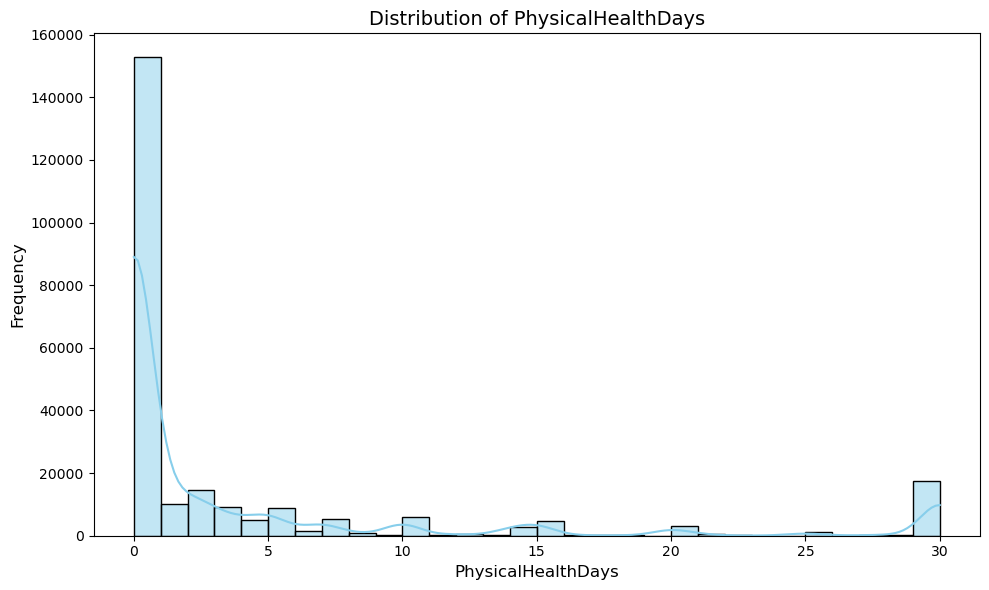

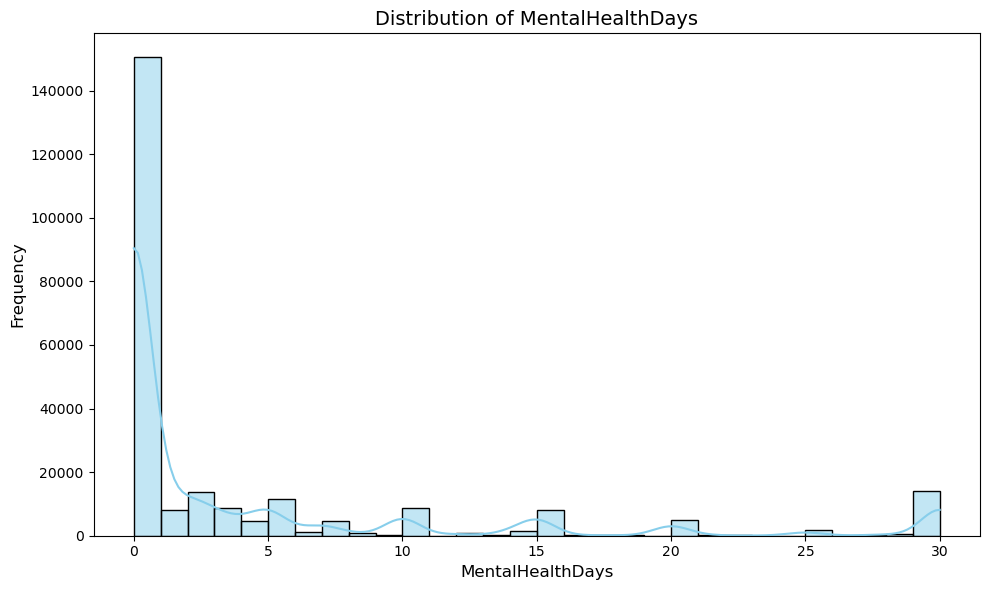

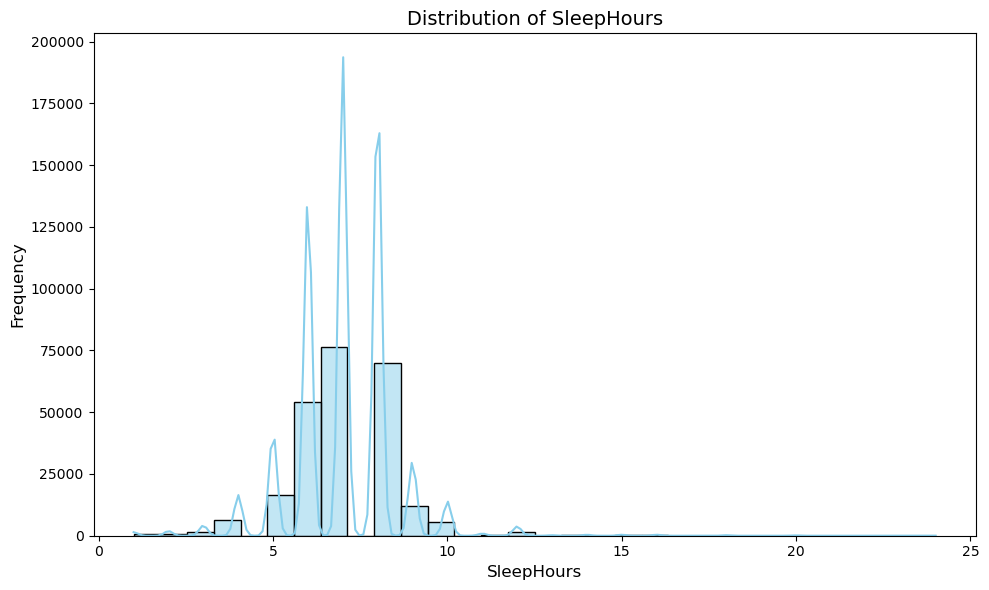

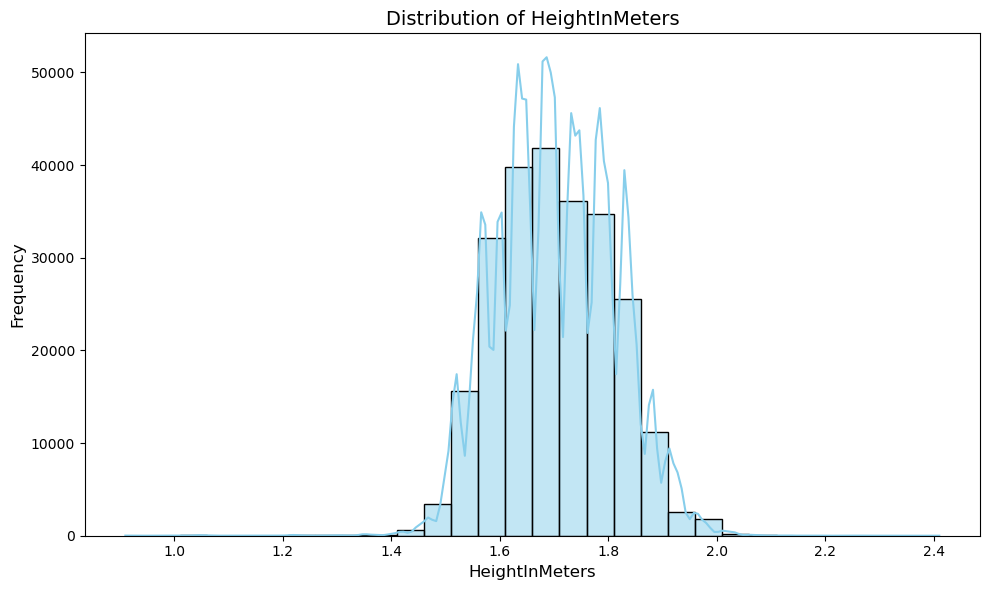

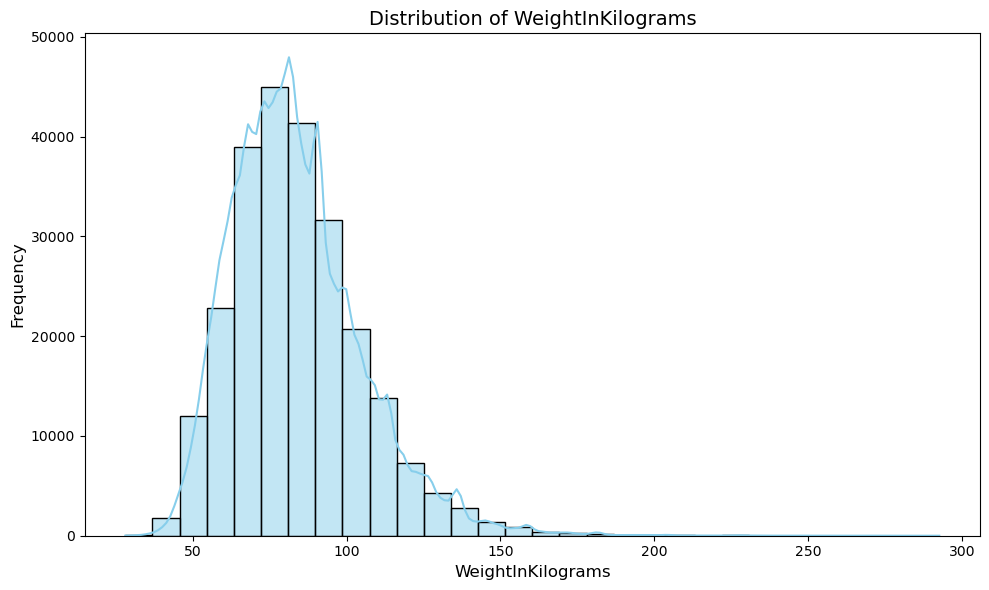

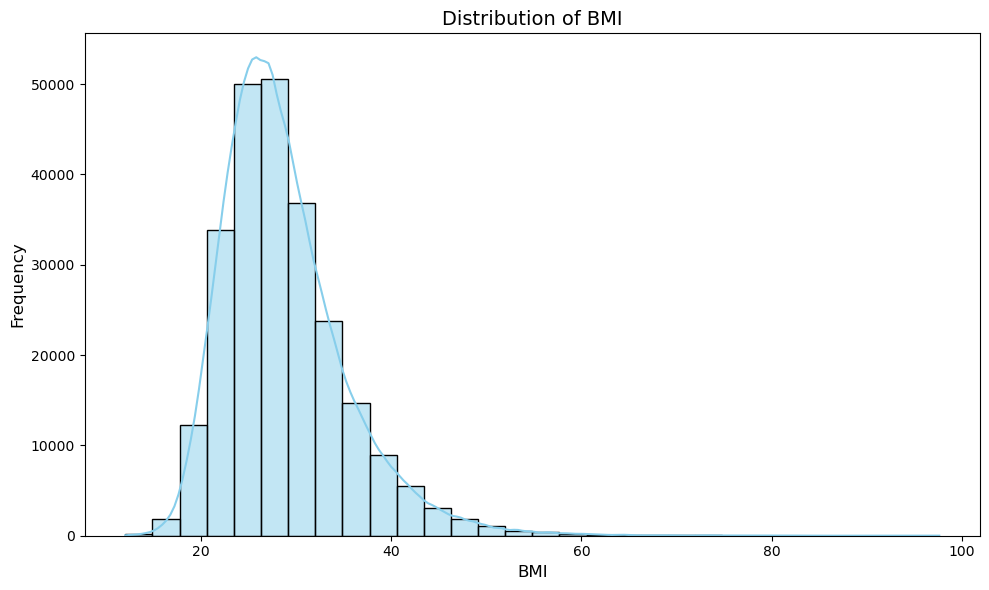

In [9]:
# Plot the distribution of each numerical variable and save each graph as a PNG file
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {column}', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.tight_layout()
    
    # Save the plot to a PNG file
    # filename = f'num_dist_{column}.png'
    # plt.savefig(filename, dpi=300)
    
    # Show the plot
    plt.show()

## Numerical Feature Improvements Based on Graphs

1. ✅ **WeightInKilograms**
   - **Distribution**: The distribution appears to be unimodal and slightly right-skewed.
   - **Actions**:
     - ✅ **Normalization or Standardization**: Apply normalization (min-max scaling) or standardization (z-score scaling) to ensure the weight feature is on a similar scale as others in your dataset.
     - ✅ **Outlier Handling**: Inspect for outliers (e.g., weights above 200kg). Consider capping or transforming extreme values to reduce their impact on the model.

2. ✅ **SleepHours**
   - **Distribution**: The distribution shows multiple spikes, which could indicate certain discrete values (e.g., 4, 6, 8 hours) are common.
   - **Actions**:
     - ✅ **Transform to Categorical**: Consider binning the sleep hours into categories such as "Low sleep (<6)", "Normal sleep (6-8)", "High sleep (>8)" for models that handle categorical data well.
     - ✅ **Feature Engineering**: Calculate a "sleep deficit" feature (e.g., ideal sleep hours minus actual sleep hours) if there’s an expected benchmark for the population.

3. ✅ **PhysicalHealthDays**
   - **Distribution**: Highly right-skewed, with a large proportion of data at zero.
   - **Actions**:
     - ✅ **Log Transformation**: Apply a log or square root transformation to reduce skewness and compress the range of large values.
     - ✅ **Categorization**: Group values into categories like "No issues (0 days)", "Mild issues (1-7 days)", "Moderate issues (8-14 days)", and "Severe issues (15+ days)" to simplify the distribution.
     - ✅ **Feature Engineering**: Combine with "MentalHealthDays" to create a total health impact variable.

4. ✅ **MentalHealthDays**
   - **Distribution**: Similar to PhysicalHealthDays, with a large proportion of zeros and a right-skewed tail.
   - **Actions**:
     - ✅ **Transformation**: Use log transformation to handle skewness.
     - ✅ **Binary Encoding**: Create an indicator feature for "Had any mental health issues" (1 if > 0 days, 0 otherwise).

5. ✅ **HeightInMeters**
   - **Distribution**: Symmetrical, resembling a normal distribution.
   - **Actions**:
     - ✅ **Standardization**: Normalize or standardize to align scales across features.

6. ✅ **BMI**
   - **Distribution**: Right-skewed, with a concentration around the 20-30 range.
   - **Actions**:
     - ✅ **Feature Engineering**: Interact BMI with other health-related features (e.g., physical activity, chronic conditions) to identify combined effects.

## Key Features Graphed

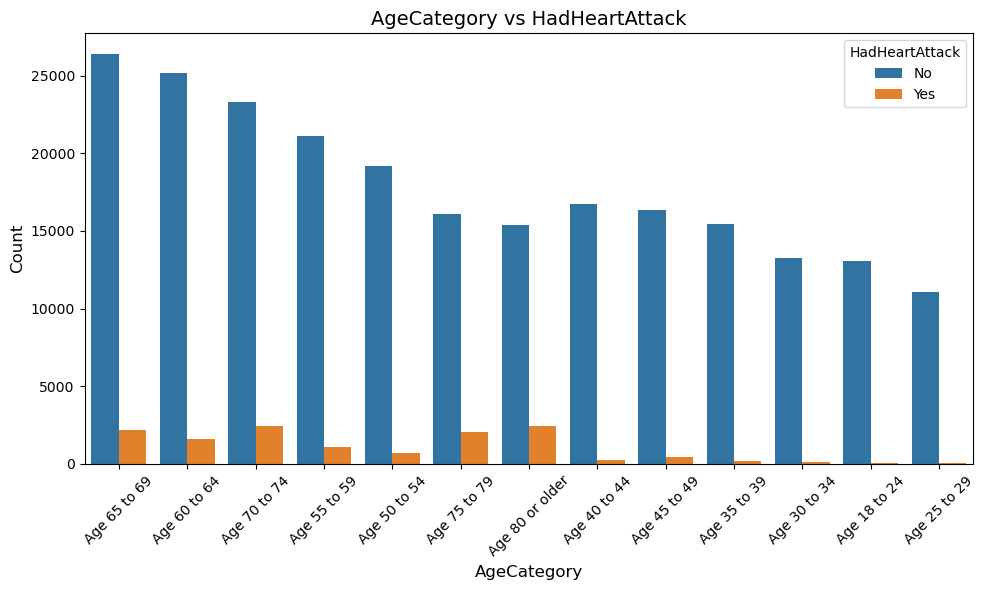

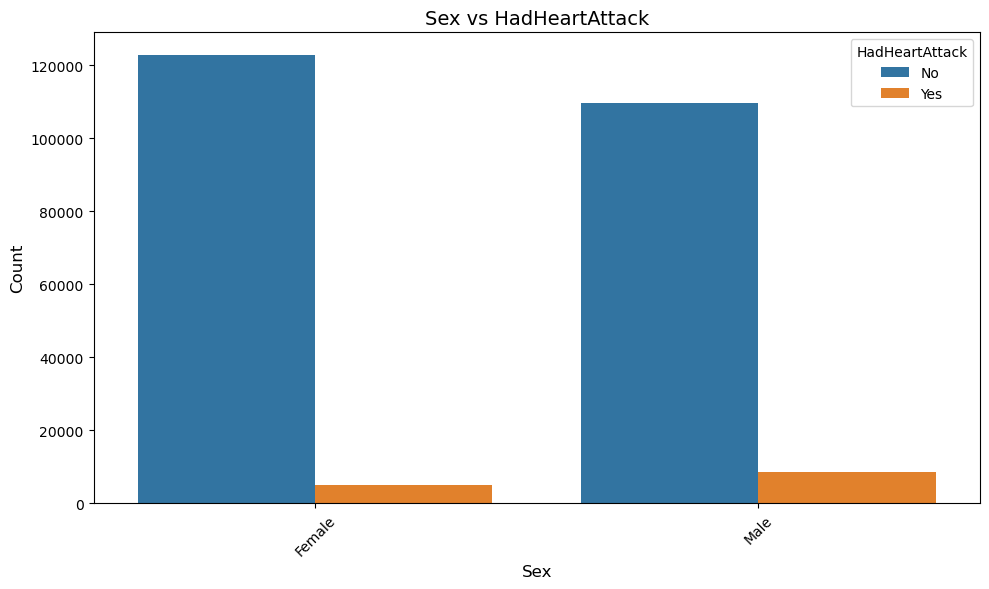

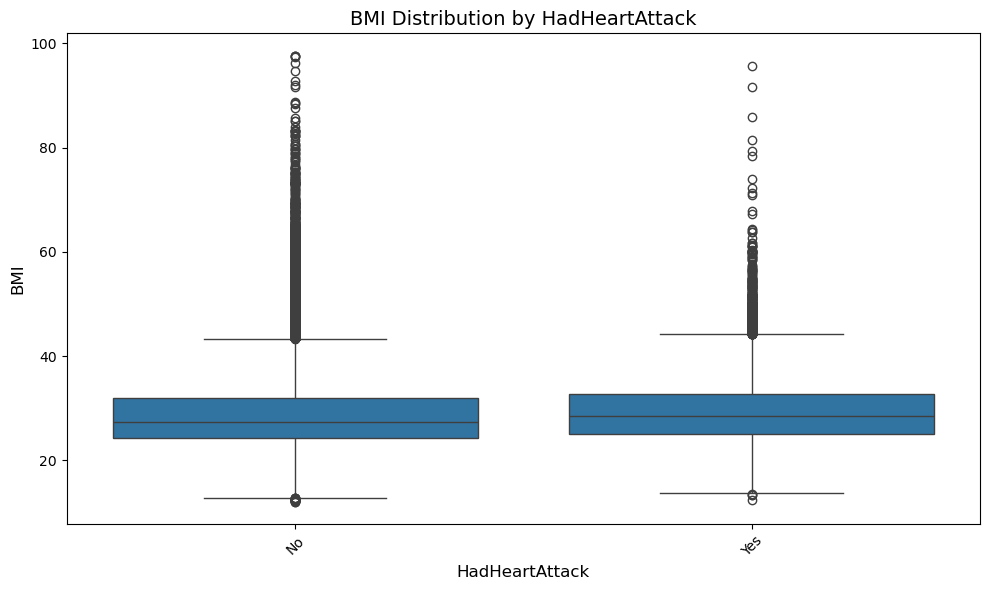

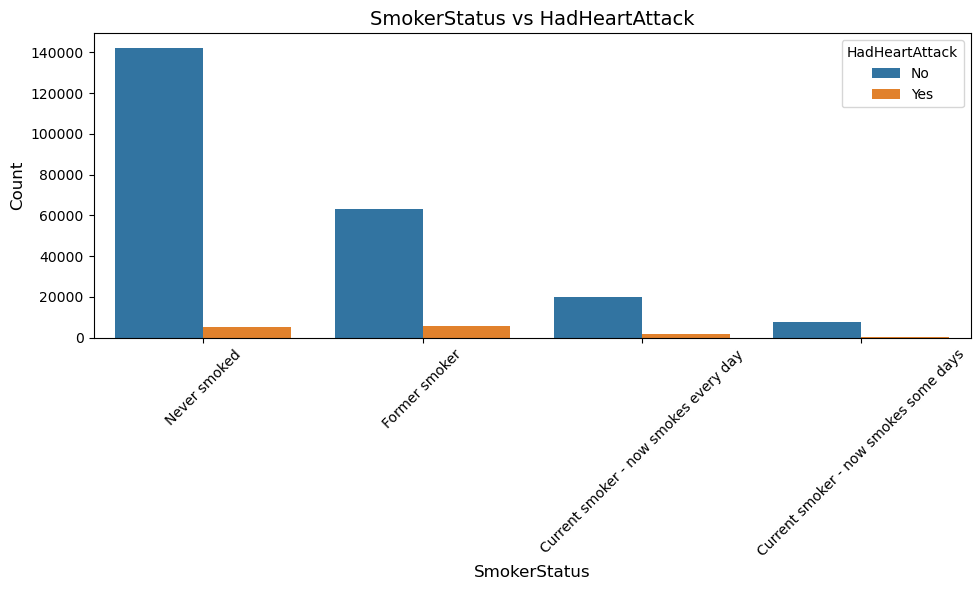

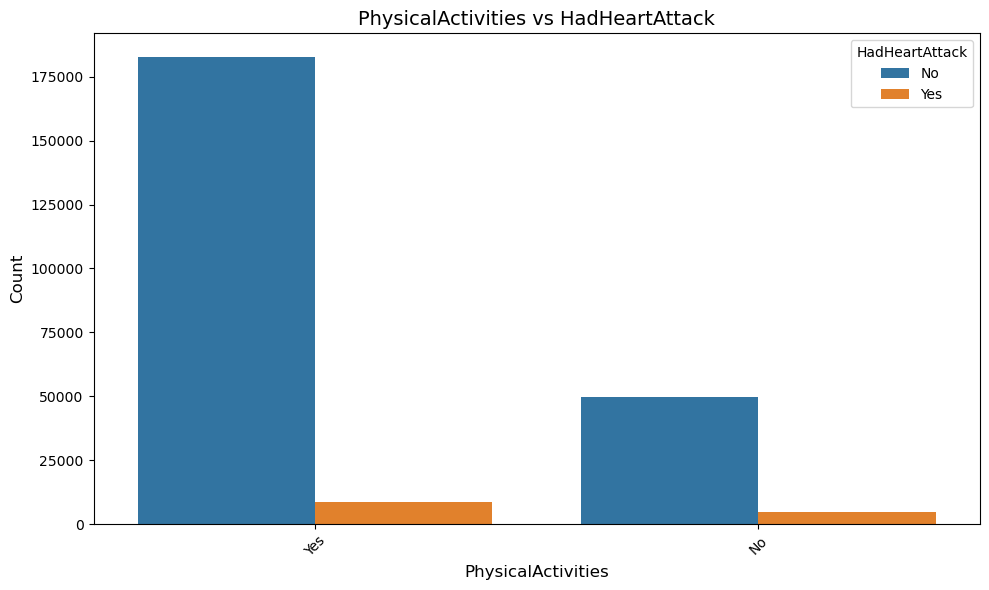

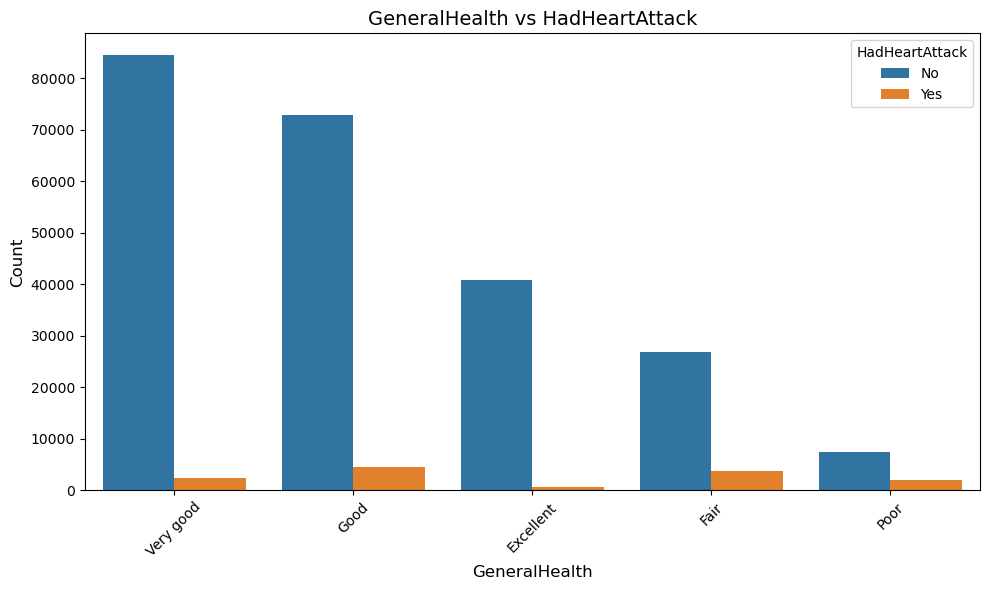

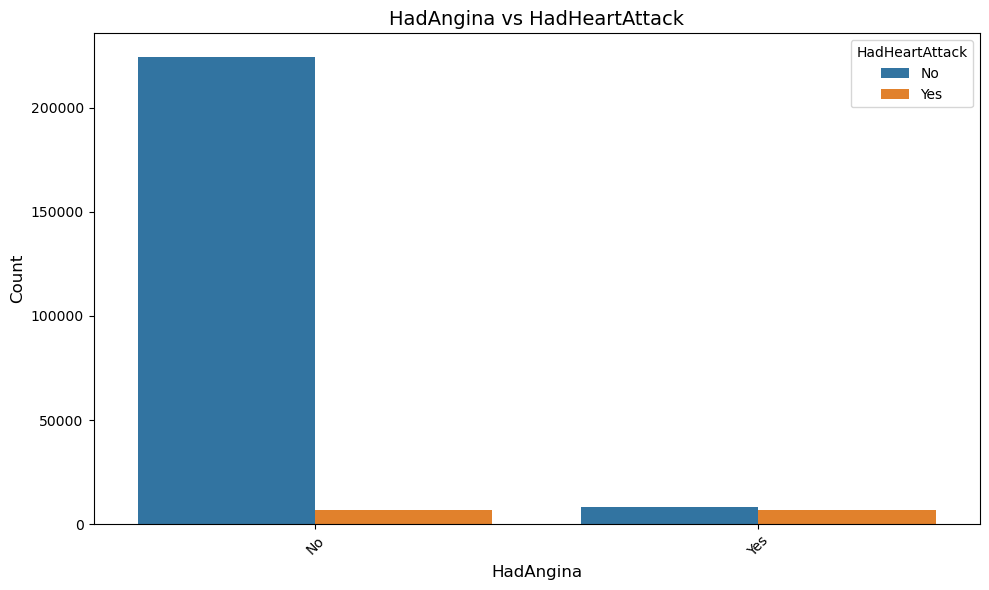

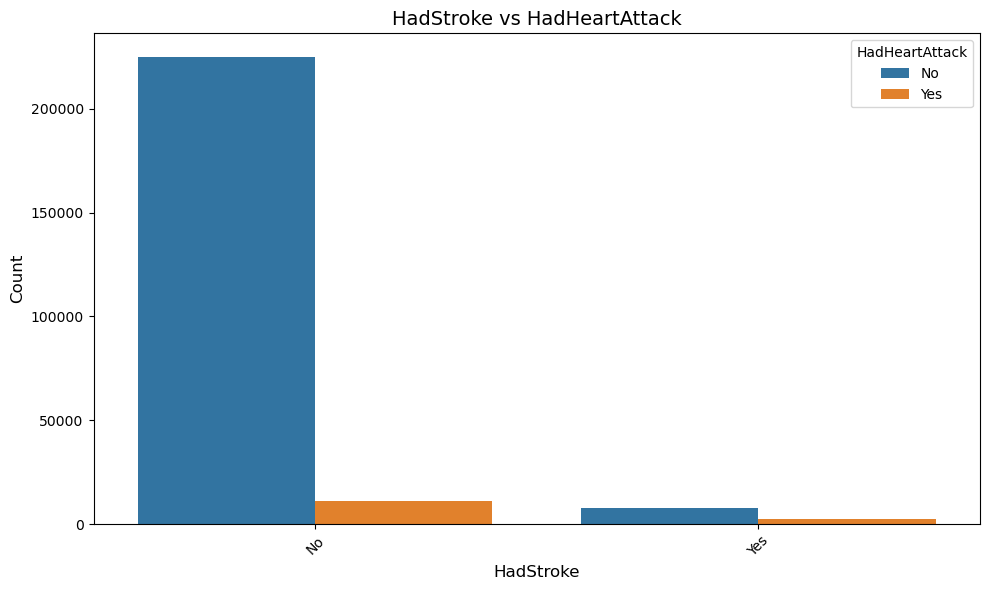

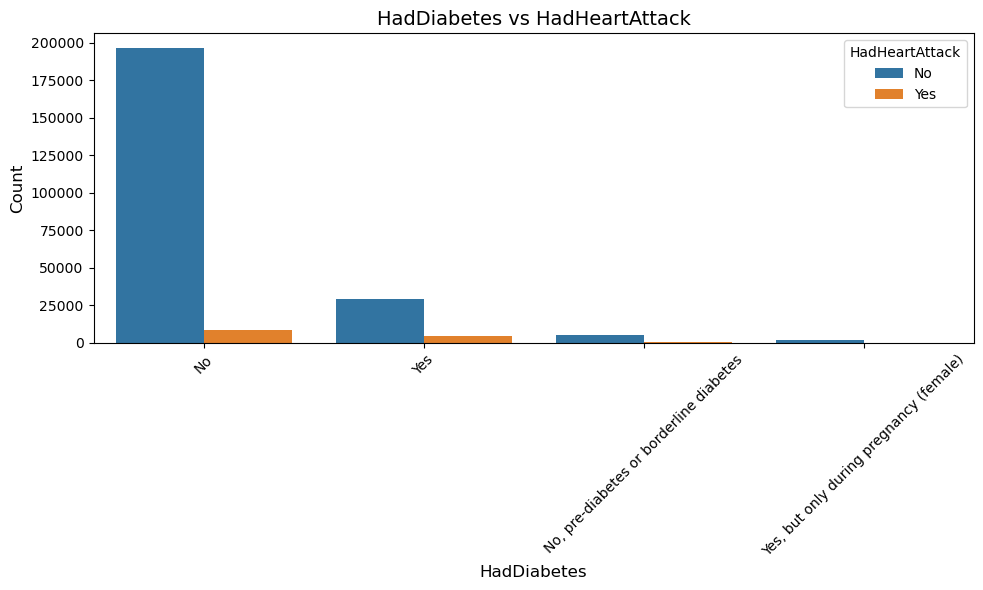

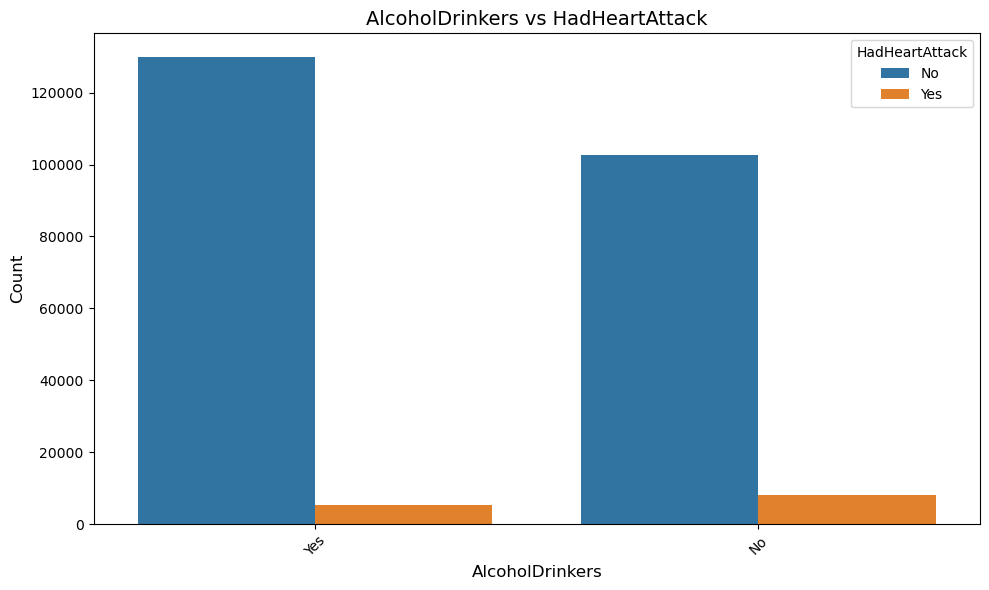

In [10]:
# Ensure 'HadHeartAttack' is present in the dataset
target = 'HadHeartAttack'

# Define a subset of key features for visualization (based on prior analysis)
key_features = [
    'AgeCategory', 'Sex', 'BMI', 'SmokerStatus', 'PhysicalActivities',
    'GeneralHealth', 'HadAngina', 'HadStroke', 'HadDiabetes', 'AlcoholDrinkers'
]

# Visualize feature-target relationships
for feature in key_features:
    plt.figure(figsize=(10, 6))
    
    if df[feature].dtype == 'object':  # Categorical features
        sns.countplot(data=df, x=feature, hue=target, order=df[feature].value_counts().index)
        plt.title(f'{feature} vs {target}', fontsize=14)
        plt.xlabel(feature, fontsize=12)
        plt.ylabel('Count', fontsize=12)
    else:  # Numeric features
        sns.boxplot(data=df, x=target, y=feature)
        plt.title(f'{feature} Distribution by {target}', fontsize=14)
        plt.xlabel(target, fontsize=12)
        plt.ylabel(feature, fontsize=12)
    
    plt.xticks(rotation=45, fontsize=10)
    plt.tight_layout()

    # Save the plot to a PNG file
    # filename = f'{feature}_vs_HadHeartAttack.png'
    # plt.savefig(filename, dpi=300)
    
    plt.show()


## Key Feature Improvements Based on Graphs

Analyzing these visualizations, here are the feature-specific observations and recommendations to improve the graphs and their utility in modeling:

1. ✅ **SmokerStatus vs HadHeartAttack**: Smokers, particularly current smokers, show a higher proportion of heart attacks compared to non-smokers.
     - ✅ Consider encoding this variable into ordinal categories such as `Never Smoked (0)`, `Former Smoker (1)`, `Current Smoker (2)`.

2. ✅ **Sex vs HadHeartAttack**: There is a difference in heart attack occurrences between males and females, with males showing a slightly higher proportion.
     - ✅ Ensure balanced sampling across genders if the dataset is imbalanced.

3. ✅ **PhysicalActivities vs HadHeartAttack**: Individuals who do not engage in physical activities appear to have a higher proportion of heart attacks.
     - ✅ Keep this variable as a binary flag. 
     - ✅ Create an interaction term between this feature and other health-related metrics (e.g., BMI or AgeCategory) for potentially better prediction.

4. **AlcoholDrinkers vs HadHeartAttack**: There is no significant difference in heart attack occurrences between drinkers and non-drinkers.
     - If this variable doesn't improve the model's performance, consider excluding it or combining it with other lifestyle features for composite effects.


These strategies should help in improving the predictive power of the features.

## Ordinal Encoding

In [11]:
# Create a new feature 'AgesGrouped' as a copy of 'AgeCategory'
df['AgesGrouped'] = df['AgeCategory']

In [12]:
# Define ordinal mappings for each feature
ordinal_mappings = {
    "GeneralHealth": {
        'Poor': 1,
        'Fair': 2,
        'Good': 3,
        'Very good': 4,
        'Excellent': 5
    },
    "LastCheckupTime": {
        '5 or more years ago': 1,
        'Within past 5 years (2 years but less than 5 years ago)': 2,
        'Within past 2 years (1 year but less than 2 years ago)': 3,
        'Within past year (anytime less than 12 months ago)': 4
    },
    "RemovedTeeth": {
        'None of them': 0,
        '1 to 5': 1,
        '6 or more, but not all': 2,
        'All': 3
    },
    "HadDiabetes": {
        'No': 0,
        'No, pre-diabetes or borderline diabetes': 0,
        'Yes, but only during pregnancy (female)': 1,
        'Yes': 1
    },
    "SmokerStatus": {
        'Never smoked': 0,
        'Former smoker': 1,
        'Current smoker - now smokes some days': 2,
        'Current smoker - now smokes every day': 2 # Combine these two.
    },
    "ECigaretteUsage": {
        'Never used e-cigarettes in my entire life': 0,
        'Not at all (right now)': 1,
        'Use them some days': 2,
        'Use them every day': 2 # Combine these two
    },
    "AgeCategory": {
        'Age 18 to 24': 1,
        'Age 25 to 29': 2,
        'Age 30 to 34': 3,
        'Age 35 to 39': 4,
        'Age 40 to 44': 5,
        'Age 45 to 49': 6,
        'Age 50 to 54': 7,
        'Age 55 to 59': 8,
        'Age 60 to 64': 9,
        'Age 65 to 69': 10,
        'Age 70 to 74': 11,
        'Age 75 to 79': 12,
        'Age 80 or older': 13
    },
    "TetanusLast10Tdap": {
        'No, did not receive any tetanus shot in the past 10 years': 1,
        'Yes, received tetanus shot but not sure what type': 2,
        'Yes, received tetanus shot, but not Tdap': 2, # Combined these two
        'Yes, received Tdap': 3
    },
    "CovidPos": {
        'No': 0,
        'Yes': 1,
        'Tested positive using home test without a health professional': 1 # Combined these two
    }
}

# Apply ordinal encoding to the specified features
for column, mapping in ordinal_mappings.items():
    df[column] = df[column].map(mapping)

# Verify the changes
print(df[list(ordinal_mappings.keys())].head())

# Remove `AgeCategory'
df = df.drop(columns=['AgeCategory'])

   GeneralHealth  LastCheckupTime  RemovedTeeth  HadDiabetes  SmokerStatus  \
0              4                4             0            0             1   
1              4                4             0            1             1   
2              4                4             2            0             1   
3              2                4             0            0             0   
4              3                4             1            0             0   

   ECigaretteUsage  AgeCategory  TetanusLast10Tdap  CovidPos  
0                0           10                  3         0  
1                0           11                  2         0  
2                0           12                  1         1  
3                0           13                  1         1  
4                0           13                  1         0  


## One-Hot Encoding

In [13]:
# Excluded features for ordinal encoding
excluded_features = [
    'GeneralHealth',
    'LastCheckupTime',
    'RemovedTeeth',
    'HadDiabetes',
    'SmokerStatus',
    'ECigaretteUsage',
    'AgeGrouped',
    'AgeCategory',
    'State',
    'TetanusLast10Tdap'
]

# Identify features to one-hot encode
one_hot_features = [col for col in categorical_columns if col not in excluded_features]

# One-hot encode the selected features and ensure the output is 0/1
df = pd.get_dummies(df, columns=one_hot_features, drop_first=True)

# Rename binary one-hot encoded columns to match the original feature names
for feature in one_hot_features:
    yes_col = f"{feature}_Yes"  # Check for "_Yes" columns
    if yes_col in df.columns:
        df.rename(columns={yes_col: feature}, inplace=True)

In [14]:
# Convert all boolean values in the DataFrame to integers (0/1)
df = df.astype({col: int for col in df.select_dtypes(include=['bool']).columns})

## Train/Test Split

In [15]:
X = df.drop(columns=['HadHeartAttack'])  
y = df['HadHeartAttack'] 

In [16]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0, stratify=y
)

## Feature Engineering

### 🔍 Feature Descriptions
1. **`ComorbidityIndex`** → Counts the number of chronic conditions a person has (e.g., Angina, Stroke, Diabetes, COPD, etc.).  
2. **`AgeMidpoint`** → Converts the age category into a numeric midpoint for easier analysis.  
3. **`ExerciseRegularity`** → Combines physical activity participation with sleep hours to estimate overall exercise regularity.  
4. **`HealthAwarenessIndex`** → Counts the number of preventive health measures taken (e.g., flu vaccine, HIV testing).  
5. **`ObesityClass`** → Categorizes BMI into standard obesity classes (`0` = Underweight, `0.333` = Normal weight, `0.666` = Overweight, `1` = Obese).  
6. **`HeartRiskScore`** → Counts the number of heart risk factors (Angina, Stroke, Difficulty Walking).  
7. **`SleepDeficit`** → Measures how much sleep deviates from the ideal 8 hours.  
8. **`PhysicalHealthInteraction`** → Interaction term multiplying `PhysicalActivities` by `GeneralHealth`, capturing how activity affects perceived health.  
9. **`ComorbidityHealthInteraction`** → Interaction between `ComorbidityIndex` and `GeneralHealth` to assess how chronic conditions impact health perception.  
10. **`ExerciseObesityInteraction`** → Interaction between `ExerciseRegularity` and `ObesityClass`, capturing the relationship between physical activity and weight category.  
11. **`HeartSleepInteraction`** → Interaction between `HeartRiskScore` and `SleepDeficit`, capturing how heart risk factors relate to sleep patterns.  
12. **`ComorbidityObesityInteraction`** → Interaction between `ComorbidityIndex` and `ObesityClass`, highlighting the correlation between chronic conditions and weight.  
13. **`HeartHealthInteraction`** → Interaction between `HeartRiskScore` and `GeneralHealth`, assessing how heart risk impacts self-reported health status.  
14. **`PhysicalAgeInteraction`** → Interaction between `PhysicalActivities` and `AgeMidpoint`, examining how age influences physical activity habits.  
15. **`ProactiveHealthScore`** → Interaction between `LastCheckupTime` and `GeneralHealth`, capturing how proactive individuals are about their healthcare.  
16. **`StateHealthIndex`** → Population-weighted health score based on the average `GeneralHealth` of individuals in a given state.  
17. **`SleepCategory`** → Categorizes sleep hours into `"Low sleep" (<6 hours)`, `"Normal sleep" (6-8 hours)`, and `"High sleep" (>8 hours)`.  
18. **`PhysicalHealthCategory`** → Categorizes `PhysicalHealthDays` into `"No issues" (0 days)`, `"Mild" (1-7 days)`, `"Moderate" (8-14 days)`, and `"Severe" (15+ days)`.  
19. **`TotalHealthDays`** → Sum of `PhysicalHealthDays` and `MentalHealthDays`, representing total days of health issues.  
20. **`HadMentalHealthIssues`** → **Binary feature** (`1` if `MentalHealthDays` > 0, otherwise `0`), identifying individuals with any mental health concerns.  
21. **`BMI_PhysicalActivity`** → Interaction between **BMI and Physical Activity**, assessing how obesity affects exercise participation.  
22. **`BMI_ChronicConditions`** → Interaction between **BMI and ComorbidityIndex**, identifying the relationship between obesity and chronic disease burden.  
23. **`BMI_SleepDeficit`** → Interaction between **BMI and SleepDeficit**, capturing how sleep disturbances may be associated with weight.  
24. **`BMI_HeartRisk`** → Interaction between **BMI and HeartRiskScore**, evaluating the combined impact of obesity and heart-related risks.
25. **`BMI_SleepDeficit`** → Measures the combined effect of BMI and Sleep Deficit, identifying potential links between weight and insufficient sleep.  
26. **`BMI_HeartRisk`** → Captures the relationship between BMI and Heart Risk Score, assessing the joint impact of weight and cardiovascular conditions.  
27. **`PhysicalActivity_Age`** → Examines how physical activity varies with age, indicating exercise trends across different age groups.  
28. **`PhysicalActivity_BMI`** → Explores the relationship between BMI and exercise participation, highlighting how weight influences activity levels.  
29. **`PhysicalActivity_ChronicConditions`** → Assesses how chronic conditions affect physical activity levels, identifying potential exercise barriers.  
30. **`PhysicalActivity_SleepDeficit`** → Captures the interaction between physical activity and sleep deficit, linking exercise habits to sleep patterns.  

In [17]:
# import numpy as np

# def feature_engineering(data):
#     # 1. Comorbidity Index
#     chronic_conditions = [
#         'HadAngina', 'HadStroke', 'HadCOPD', 'HadDepressiveDisorder', 
#         'HadKidneyDisease', 'HadArthritis', 'HadDiabetes'
#     ]
#     data['ComorbidityIndex'] = data[chronic_conditions].apply(lambda x: x.eq('Yes').sum(), axis=1)

#     # 2. Apply Square Root Transformation to Reduce Skewness
#     skewed_features = ['ComorbidityIndex', 'PhysicalHealthDays', 'MentalHealthDays']
#     for feature in skewed_features:
#         data[feature] = np.sqrt(data[feature])
    
#     # 3. Age Group Numeric
#     age_map = {
#         'Age 18 to 24': 21, 'Age 25 to 29': 27, 'Age 30 to 34': 32,
#         'Age 35 to 39': 37, 'Age 40 to 44': 42, 'Age 45 to 49': 47,
#         'Age 50 to 54': 52, 'Age 55 to 59': 57, 'Age 60 to 64': 62,
#         'Age 65 to 69': 67, 'Age 70 to 74': 72, 'Age 75 to 79': 77,
#         'Age 80 or older': 85
#     }
#     data['AgeMidpoint'] = data['AgesGrouped'].map(age_map)

#     # 4. Exercise Regularity
#     data['ExerciseRegularity'] = data['PhysicalActivities'].apply(lambda x: 1 if x == 'Yes' else 0) * data['SleepHours']
#     data['ExerciseRegularity'] = data['ExerciseRegularity'].replace([float('inf'), -float('inf')], float('nan'))
#     data['ExerciseRegularity'] = data['ExerciseRegularity'].fillna(0)

#     # 5. Health Awareness Index
#     preventive_measures = ['FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap', 'HIVTesting']
#     data['HealthAwarenessIndex'] = data[preventive_measures].apply(lambda x: x.eq('Yes').sum(), axis=1)

#     # 6. Obesity Class
#     def classify_bmi(bmi):
#         if bmi < 18.5:
#             return 0
#         elif 18.5 <= bmi < 24.9:
#             return 0.33333
#         elif 25 <= bmi < 29.9:
#             return 0.66666
#         else:
#             return 1
#     data['ObesityClass'] = data['BMI'].apply(classify_bmi)

#     # 7. Heart Risk Score 
#     heart_risk_factors = ['HadAngina', 'HadStroke', 'DifficultyWalking']
#     data['HeartRiskScore'] = data[heart_risk_factors].sum(axis=1) 

#     # 8. Apply Square Root Transformation to Reduce Skewness 
#     skewed_features = ['HeartRiskScore', 'BMI']
#     for feature in skewed_features:
#         data[feature] = np.sqrt(data[feature])

#     # 9. Sleep Deficit 
#     IDEAL_SLEEP_HOURS = 8
#     data['SleepDeficit'] = IDEAL_SLEEP_HOURS - data['SleepHours']  

#     # 10. Interaction Feature: PhysicalActivities × GeneralHealth
#     data['PhysicalHealthInteraction'] = (
#         data['PhysicalActivities'].apply(lambda x: 1 if x == 'Yes' else 0) * data['GeneralHealth']
#     )

#     # 11. ComorbidityIndex × GeneralHealth
#     data['ComorbidityHealthInteraction'] = data['ComorbidityIndex'] * data['GeneralHealth']

#     # 12. ExerciseRegularity × ObesityClass
#     data['ExerciseObesityInteraction'] = data['ExerciseRegularity'] * data['ObesityClass']

#     # 13. HeartRiskScore × SleepDeficit
#     data['HeartSleepInteraction'] = data['HeartRiskScore'] * data['SleepDeficit']

#     # 14. **ComorbidityIndex × ObesityClass**  
#     data['ComorbidityObesityInteraction'] = data['ComorbidityIndex'] * data['ObesityClass']

#     # 15. **HeartRiskScore × GeneralHealth**  
#     data['HeartHealthInteraction'] = data['HeartRiskScore'] * data['GeneralHealth']

#     # 16. **PhysicalActivities × AgeMidpoint**  
#     data['PhysicalAgeInteraction'] = data['PhysicalActivities'].apply(lambda x: 1 if x == 'Yes' else 0) * data['AgeMidpoint']

#     # 17. **Proactive Health Score: Pre-Encoded LastCheckupTime × GeneralHealth**
#     data['ProactiveHealthScore'] = data['LastCheckupTime'] * data['GeneralHealth']

#     # 18. **Population-Weighted State Health Index**
#     state_health_index = data.groupby("State")["GeneralHealth"].mean().to_dict()
#     data["StateHealthIndex"] = data["State"].map(state_health_index)

#     # 19. **Categorize Sleep Hours into "Low sleep", "Normal sleep", and "High sleep"**
#     def categorize_sleep_hours(hours):
#         if hours < 6:
#             return 0
#         elif 6 <= hours <= 8:
#             return 0.5
#         else:
#             return 1

#     data['SleepCategory'] = data['SleepHours'].apply(categorize_sleep_hours)

#     # 20. Categorize Physical Health Days into "No issues", "Mild", "Moderate", and "Severe"
#     def categorize_physical_health_days(days):
#         if days == 0:
#             return 0  # No issues
#         elif 1 <= days <= 7:
#             return 1  # Mild issues
#         elif 8 <= days <= 14:
#             return 2  # Moderate issues
#         else:
#             return 3  # Severe issues

#     data['PhysicalHealthCategory'] = data['PhysicalHealthDays'].apply(categorize_physical_health_days)

#     # 21. Total days taken off.
#     data['TotalHealthDays'] = data['PhysicalHealthDays'] + data['MentalHealthDays']

#     # 22. Create a binary indicator for whether a person had any mental health issues
#     data["HadMentalHealthIssues"] = (data["MentalHealthDays"] > 0).astype(int)

#     # 23. BMI × Physical Activity → Assess impact of obesity on exercise participation
#     data["BMI_PhysicalActivity"] = data["BMI"] * data["PhysicalActivities"].apply(lambda x: 1 if x == 'Yes' else 0)
    
#     # 24. BMI × Chronic Conditions → Identifies relationships between obesity and chronic disease burden
#     data["BMI_ChronicConditions"] = data["BMI"] * data["ComorbidityIndex"]
    
#     # 25. BMI × Sleep Deficit → Captures how sleep disturbances may be associated with weight
#     data["BMI_SleepDeficit"] = data["BMI"] * data["SleepDeficit"]
    
#     # 26. BMI × Heart Risk Score → Evaluates combined impact of weight and heart-related risks
#     data["BMI_HeartRisk"] = data["BMI"] * data["HeartRiskScore"]

#     # 27. Physical Activity × AgeMidpoint → How exercise patterns vary by age
#     data["PhysicalActivity_Age"] = data["PhysicalActivities"].apply(lambda x: 1 if x == 'Yes' else 0) * data["AgeMidpoint"]
    
#     # 28. Physical Activity × BMI → Relationship between obesity and exercise behavior
#     data["PhysicalActivity_BMI"] = data["PhysicalActivities"].apply(lambda x: 1 if x == 'Yes' else 0) * data["BMI"]
    
#     # 29. Physical Activity × Chronic Conditions → Effect of chronic illnesses on exercise
#     data["PhysicalActivity_ChronicConditions"] = data["PhysicalActivities"].apply(lambda x: 1 if x == 'Yes' else 0) * data["ComorbidityIndex"]
    
#     # 30. Physical Activity × Sleep Deficit → Relationship between exercise and sleep habits
#     data["PhysicalActivity_SleepDeficit"] = data["PhysicalActivities"].apply(lambda x: 1 if x == 'Yes' else 0) * data["SleepDeficit"]


#     return data


# # Apply feature engineering to train and test sets
# X_train = feature_engineering(X_train)
# X_test = feature_engineering(X_test)


## Resample Gender

In [18]:
from sklearn.utils import resample

# Separate data by gender
male_data = X_train[X_train['Sex_Male'] == 1]
female_data = X_train[X_train['Sex_Male'] == 0]

# Find the majority gender
max_size = max(len(male_data), len(female_data))

# Oversample the minority gender to match the majority size
male_data_oversampled = resample(male_data, replace=True, n_samples=max_size, random_state=42)
female_data_oversampled = resample(female_data, replace=True, n_samples=max_size, random_state=42)

# Combine the balanced dataset
X_train_balanced = pd.concat([male_data_oversampled, female_data_oversampled]).sample(frac=1, random_state=42)

# Ensure y_train is also updated
y_train_balanced = y_train.loc[X_train_balanced.index]

# Verify new gender distribution
print("\nBalanced Gender Distribution (%):")
print(X_train_balanced['Sex_Male'].value_counts(normalize=True) * 100)



Balanced Gender Distribution (%):
Sex_Male
1    50.0
0    50.0
Name: proportion, dtype: float64


Drop the `AgesGrouped` feature.

In [19]:
# Remove 'AgesGrouped' from X_train and X_test
X_train = X_train.drop(columns=['AgesGrouped'])
X_test = X_test.drop(columns=['AgesGrouped'])

## Encoding of the `State` Feature

In [20]:
import pandas as pd

# Ensure y_train is a Pandas Series with proper indexing
y_train = pd.Series(y_train, index=X_train.index, dtype=float)  

# Compute mean target value for each state
state_means = y_train.groupby(X_train['State']).mean()

# Apply encoding to train and test data
X_train['State_encoded'] = X_train['State'].map(state_means)
X_test['State_encoded'] = X_test['State'].map(state_means)

# Fill missing values in test data (for unseen states) **without inplace=True**
X_test['State_encoded'] = X_test['State_encoded'].fillna(X_train['State_encoded'].mean())

# Drop original column **explicit reassignment**
X_train = X_train.drop(columns=['State'])
X_test = X_test.drop(columns=['State'])


## Create Train/Test Data for Tree-Based Models

In [21]:
# Keep raw features for tree-based models
X_train_tree = X_train.copy()
X_test_tree = X_test.copy()

## Create Train/Test Data for Linear Models

In [22]:
X_train_linear = X_train.copy()
X_test_linear = X_test.copy()

## Mutual Information


Calculate MI scores.

In [23]:
from sklearn.feature_selection import mutual_info_classif

# Calculate mutual information
mi_scores = mutual_info_classif(X_train_linear, y_train)

# Create a DataFrame for results
mi_results = pd.DataFrame({
    'Feature': X_train_linear.columns,
    'MI_Score': mi_scores
}).sort_values(by='MI_Score', ascending=False)

Graph of the MI scores.

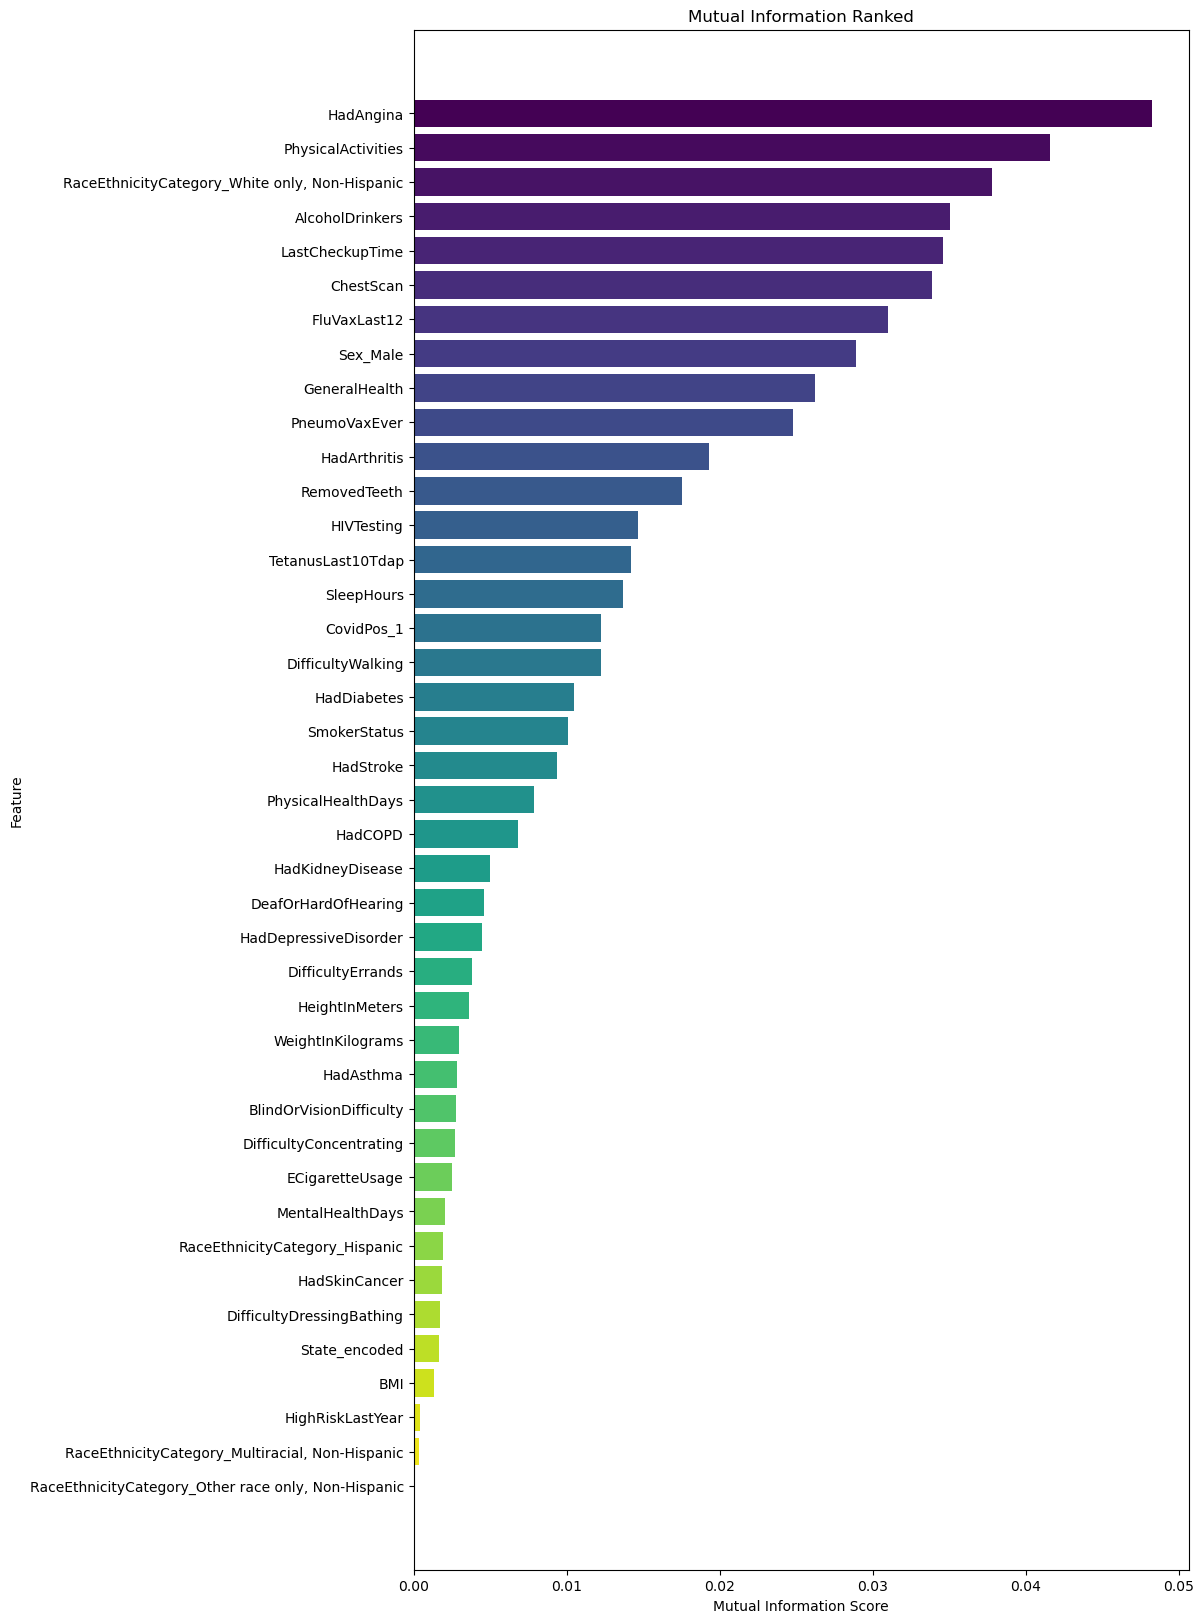

In [24]:
import numpy as np

# Define the number of features dynamically
num_features = len(mi_results)

# Generate colors using a colormap
colors = plt.cm.viridis(np.linspace(0, 1, num_features))  # Adjust 'viridis' as needed

# Plot bar chart with a colormap
plt.figure(figsize=(10, 20))
plt.barh(mi_results['Feature'], mi_results['MI_Score'], color=colors)
plt.xlabel("Mutual Information Score")
plt.ylabel("Feature")
plt.title(f"Mutual Information Ranked")
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.savefig('MI_scores.png', dpi=300)
plt.show()

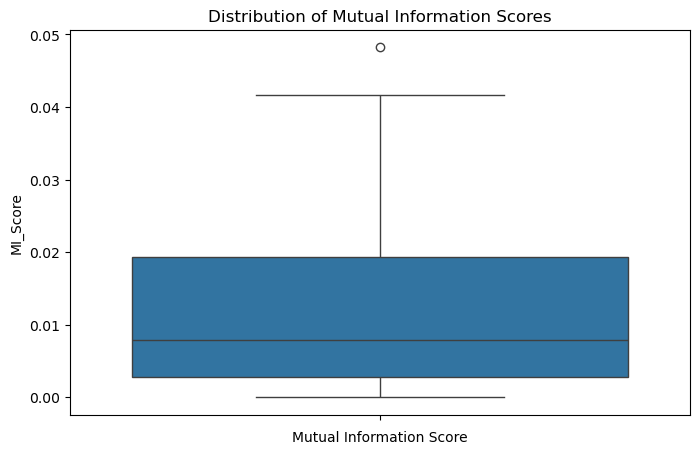

In [25]:
plt.figure(figsize=(8, 5))
sns.boxplot(y=mi_results['MI_Score'])
plt.title("Distribution of Mutual Information Scores")
plt.xlabel("Mutual Information Score")
plt.savefig('dist_of_MI.png', dpi=300)
plt.show()


## Calculate Correlation

In [26]:
# Compute correlation matrix (only for numerical features)
corr_matrix = X_train_linear.corr()

## Identify Highly Correlated Features

In [27]:
# Identify features with high correlation (absolute value > 0.8)
threshold = 0.8
high_corr_pairs = (corr_matrix.abs() > threshold).stack()
high_corr_pairs = high_corr_pairs[high_corr_pairs == True].reset_index()
high_corr_pairs.columns = ['Feature1', 'Feature2', 'Correlation']

# Remove self-correlations (where Feature1 == Feature2)
high_corr_pairs = high_corr_pairs[high_corr_pairs['Feature1'] != high_corr_pairs['Feature2']]

# Ensure unique sets of correlated pairs by sorting feature names and dropping duplicates
high_corr_pairs['Sorted_Pair'] = high_corr_pairs.apply(lambda row: tuple(sorted([row['Feature1'], row['Feature2']])), axis=1)
high_corr_pairs = high_corr_pairs.drop_duplicates(subset=['Sorted_Pair']).drop(columns=['Sorted_Pair'])

# Add a column that shows the correlation score of Feature1 with Feature2
high_corr_pairs['Feature1_Correlation'] = high_corr_pairs.apply(
    lambda row: corr_matrix.loc[row['Feature1'], row['Feature2']], axis=1
)

# Print results
print("Unique highly correlated feature pairs with correlation scores:")
print(high_corr_pairs)

Unique highly correlated feature pairs with correlation scores:
             Feature1 Feature2  Correlation  Feature1_Correlation
11  WeightInKilograms      BMI         True              0.859947


### Drop Lower MI Features in Correlated Pairs

In [28]:
# Iterate through correlated feature pairs and remove the one with the lowest MI score
for _, row in high_corr_pairs.iterrows():
    feature1, feature2 = row['Feature1'], row['Feature2']
    
    # Ensure both features exist in mi_results before proceeding
    if feature1 in mi_results['Feature'].values and feature2 in mi_results['Feature'].values:
        # Retrieve MI scores for the correlated features
        mi_score1 = mi_results.loc[mi_results['Feature'] == feature1, 'MI_Score'].values[0]
        mi_score2 = mi_results.loc[mi_results['Feature'] == feature2, 'MI_Score'].values[0]

        # Identify the feature with the lower MI score
        feature_to_drop = feature1 if mi_score1 < mi_score2 else feature2

        # Drop from X_train_linear and X_test_linear if it exists
        if feature_to_drop in X_train_linear.columns:
            X_train_linear = X_train_linear.drop(columns=[feature_to_drop])
        if feature_to_drop in X_test_linear.columns:
            X_test_linear = X_test_linear.drop(columns=[feature_to_drop])
        
        # Drop from mi_results if it exists
        mi_results = mi_results[mi_results['Feature'] != feature_to_drop]

        print(f"Dropped feature: {feature_to_drop} (Lower MI Score: {min(mi_score1, mi_score2)})")

Dropped feature: BMI (Lower MI Score: 0.0013553383583431167)


## Plot Remaining Features by MI Score

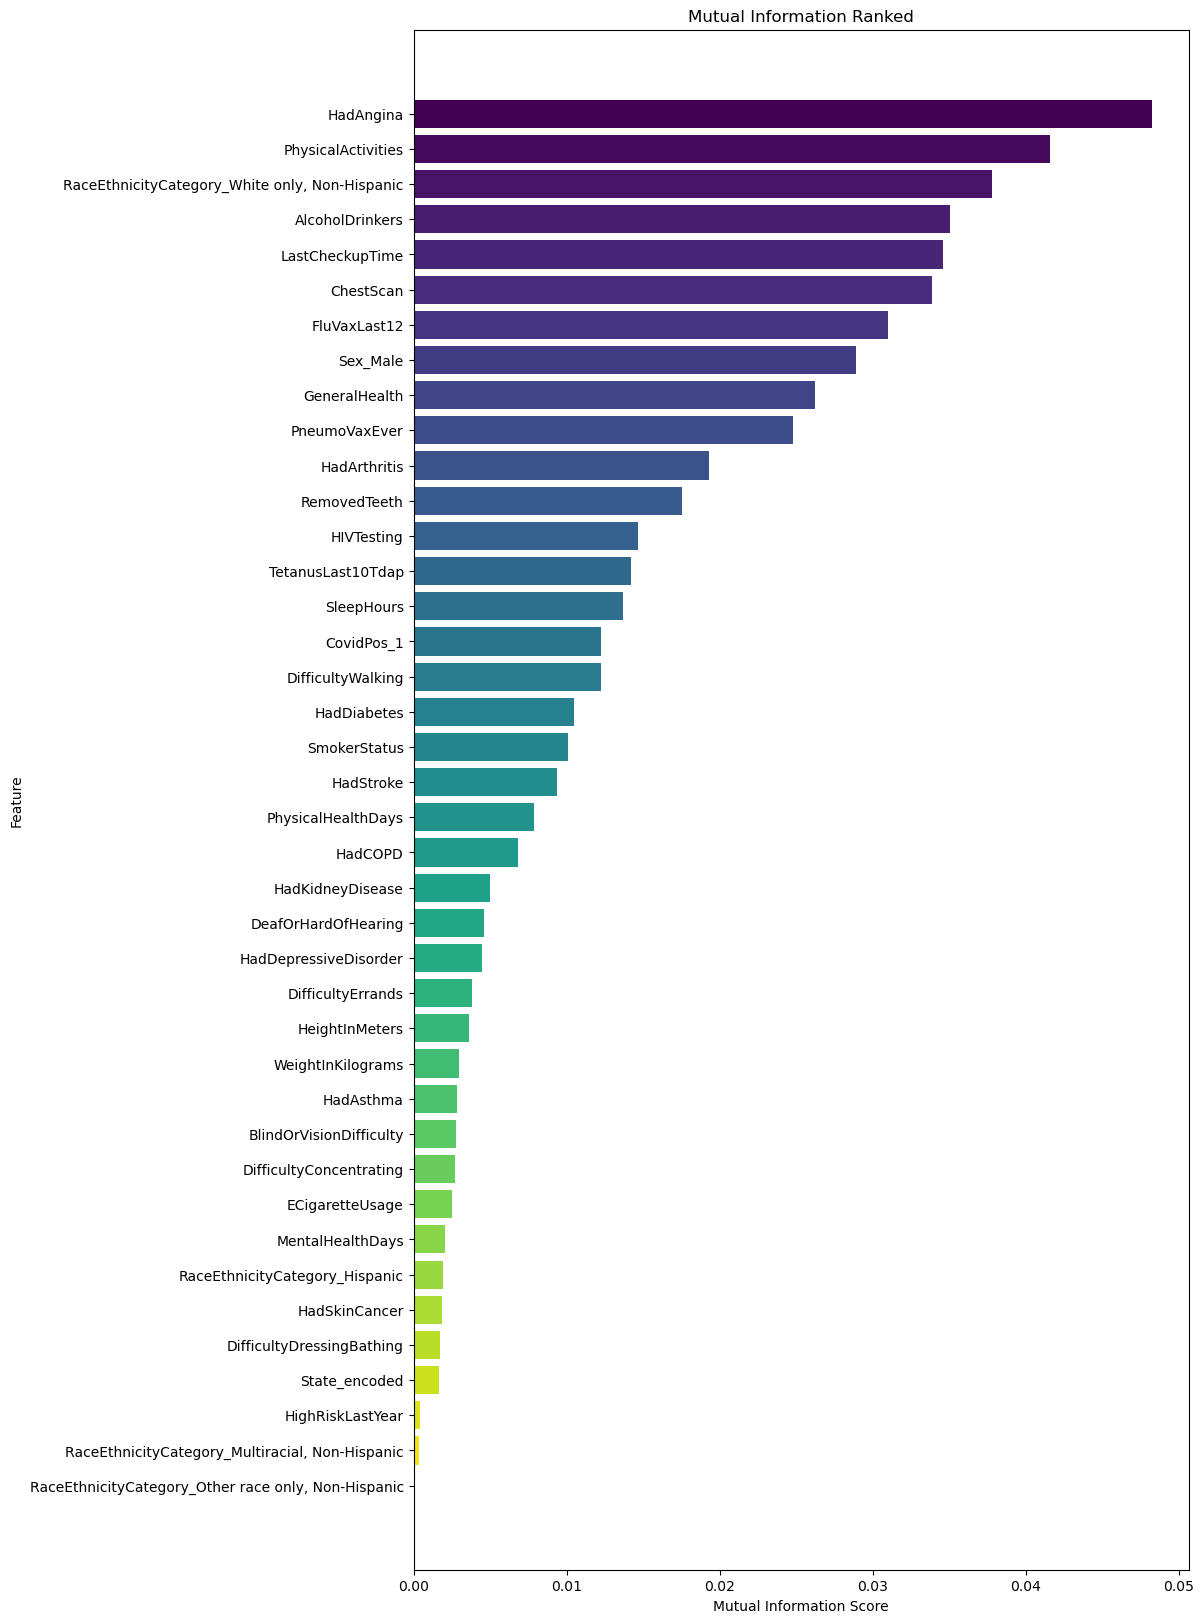

In [29]:
# Define the number of features dynamically
num_features = len(mi_results)

# Generate colors using a colormap
colors = plt.cm.viridis(np.linspace(0, 1, num_features))  # Adjust 'viridis' as needed

# Plot bar chart with a colormap
plt.figure(figsize=(10, 20))
plt.barh(mi_results['Feature'], mi_results['MI_Score'], color=colors)
plt.xlabel("Mutual Information Score")
plt.ylabel("Feature")
plt.title(f"Mutual Information Ranked")
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.savefig('MI_scores_2.png', dpi=300)
plt.show()

Based on the  graph:

1. Retain top 10-15 features with the highest MI scores for your initial model.
2. Use recursive feature elimination (RFE) or a model-specific feature importance metric (e.g., feature importance from Random Forest) to fine-tune the selection further.
3. Consider the importance of domain knowledge for including some features, even if their MI scores are slightly lower.

## Select Linear Model Features

In [30]:
# Select the top N features based on MI scores
top_n = 15
top_features = mi_results.head(top_n)['Feature'].tolist()  # Convert Series to list

# Filter X_train_linear and X_test_linear to include only top features
X_train_linear = X_train_linear[top_features]
X_test_linear = X_test_linear[top_features]

# Verify the selection
print(f"Selected top features:", top_features)
print("X_train_linear shape:", X_train_linear.shape)
print("X_test_linear shape:", X_test_linear.shape)


Selected top features: ['HadAngina', 'PhysicalActivities', 'RaceEthnicityCategory_White only, Non-Hispanic', 'AlcoholDrinkers', 'LastCheckupTime', 'ChestScan', 'FluVaxLast12', 'Sex_Male', 'GeneralHealth', 'PneumoVaxEver', 'HadArthritis', 'RemovedTeeth', 'HIVTesting', 'TetanusLast10Tdap', 'SleepHours']
X_train_linear shape: (196817, 15)
X_test_linear shape: (49205, 15)


## Undersampling and SMOTE

In [31]:
# Display class distribution as percentages
heart_attack_distribution = df['HadHeartAttack'].value_counts(normalize=True) * 100

# Print results
print("Percentage distribution of HadHeartAttack:")
print(heart_attack_distribution)


Percentage distribution of HadHeartAttack:
HadHeartAttack
0    94.539106
1     5.460894
Name: proportion, dtype: float64


In [32]:
import warnings
from imblearn.combine import SMOTETomek

# Suppress FutureWarnings from Scikit-learn
warnings.simplefilter(action='ignore', category=FutureWarning)

# Initialize SMOTETomek
smote_tomek = SMOTETomek(random_state=0)

# Apply SMOTETomek separately for linear and tree-based models
X_train_linear, y_train_linear = smote_tomek.fit_resample(X_train_linear, y_train)

X_train_tree, y_train_tree = smote_tomek.fit_resample(X_train_tree, y_train)

# Verify class distributions
print("\nClass distribution after SMOTE-Tomek (Linear Model Data):\n", y_train_linear.value_counts())
print("\nClass distribution after SMOTE-Tomek (Tree Model Data):\n", y_train_tree.value_counts())

# Verify new shapes of training data
print(f"X_train_linear shape: {X_train_linear.shape}")
print(f"X_train_tree shape: {X_train_tree.shape}")
print(f"y_train_linear shape: {y_train_linear.shape}")
print(f"y_train_tree shape: {y_train_tree.shape}")



Class distribution after SMOTE-Tomek (Linear Model Data):
 HadHeartAttack
0.0    186068
1.0    186068
Name: count, dtype: int64

Class distribution after SMOTE-Tomek (Tree Model Data):
 HadHeartAttack
0.0    186053
1.0    186053
Name: count, dtype: int64
X_train_linear shape: (372136, 15)
X_train_tree shape: (372106, 41)
y_train_linear shape: (372136,)
y_train_tree shape: (372106,)


## Select Tree-Based Model Features

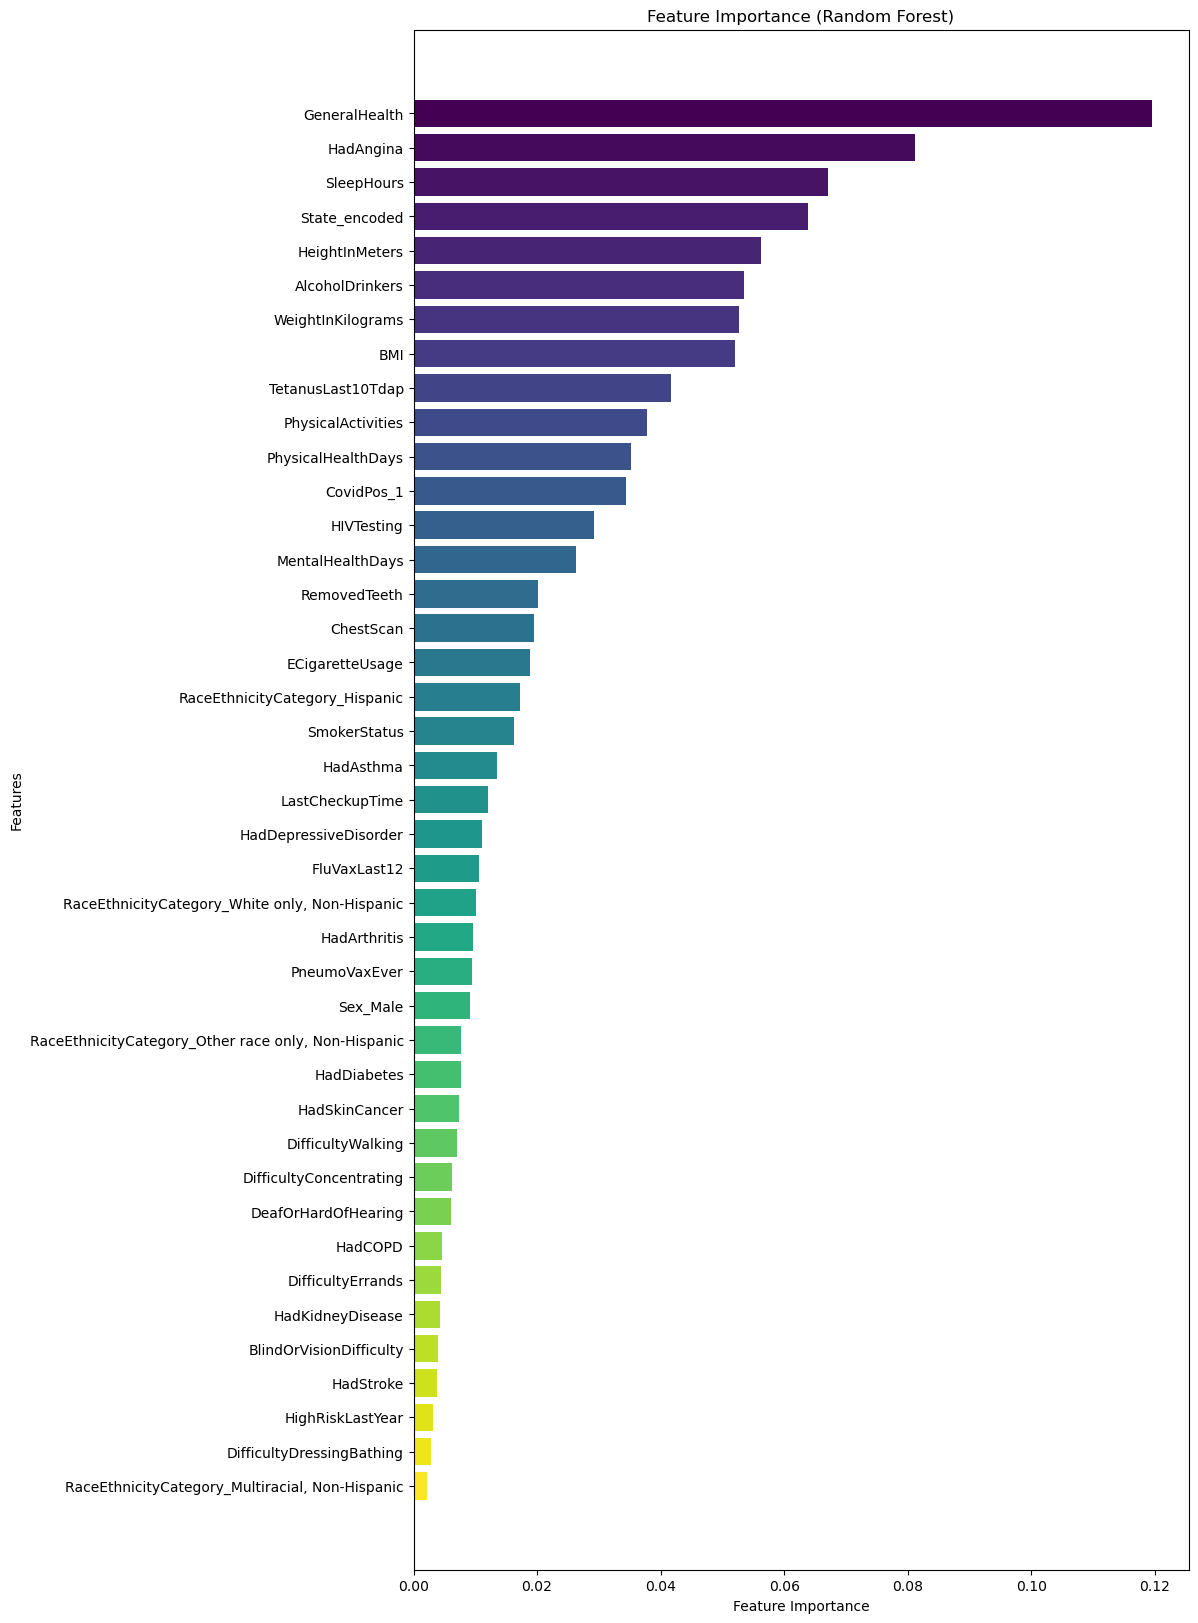

In [33]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest model to get feature importance
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train_tree, y_train_tree)

# Get feature importance
feature_importance = pd.DataFrame({
    'Feature': X_train_tree.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Define the number of features dynamically
num_features = len(feature_importance)

# Generate colors using a colormap
colors = plt.cm.viridis(np.linspace(0, 1, num_features))  # Adjust 'viridis' as needed

# Plot feature importance for all features
plt.figure(figsize=(10, 20))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color=colors)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance (Random Forest)")
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature on top
plt.show()

In [34]:
# Define the top features for tree-based models
top_features = 15
top_features = feature_importance.head(top_features)['Feature'].tolist()  # Convert Series to list

# Select only these features for training and testing sets
X_train_tree = X_train_tree[top_features]
X_test_tree = X_test_tree[top_features]

## Scaling Data for Linear Models

In [35]:
from sklearn.preprocessing import MinMaxScaler

# Initialize and fit the scaler on X_train_linear
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_linear)  # Fit + transform on X_train_linear

# Apply the SAME scaler to X_test_linear (only transform, no fitting!)
X_test_scaled = scaler.transform(X_test_linear)

# Convert back to DataFrame (optional, if you want to keep column names)
X_train_linear = pd.DataFrame(X_train_scaled, columns=X_train_linear.columns, index=X_train_linear.index)
X_test_linear = pd.DataFrame(X_test_scaled, columns=X_test_linear.columns, index=X_test_linear.index)

# <span style="color:#5E6997">Predict Heart Attacks</span> <a class="anchor" id="predict"></a>

## Define a Function to Evaluate Models

In [36]:
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def evaluate_model_performance(model, X_test, y_test):
    """
    Evaluates model performance, calculates ROC score, plots the confusion matrix, 
    and saves it with a dynamic file name based on the model's class name.

    Parameters:
    - model: Trained model object (supports `predict_proba`, `decision_function`, or TensorFlow's `predict`).
    - X_test: Test feature set.
    - y_test: Test target set.
    """
    # Determine the model name
    if hasattr(model, "__class__"):
        model_name = model.__class__.__name__.lower()
    else:
        model_name = "tensorflow_model"

    # Handle prediction probabilities or outputs
    try:
        if hasattr(model, "predict_proba"):  # Scikit-learn models with predict_proba
            y_proba = model.predict_proba(X_test)[:, 1]
        elif hasattr(model, "decision_function"):  # Scikit-learn models with decision_function
            y_proba = model.decision_function(X_test)
        elif hasattr(model, "predict"):  # TensorFlow models
            y_proba = model.predict(X_test).ravel()  # Flatten probabilities for binary classification
        else:
            raise AttributeError(f"The model {model_name} does not support the necessary prediction methods.")
    except Exception as e:
        raise RuntimeError(f"Error in generating predictions: {e}")

    # Convert probabilities to binary predictions for confusion matrix and classification report
    y_pred = (y_proba >= 0.5).astype(int)

    # Compute ROC AUC Score
    roc_score = roc_auc_score(y_test, y_proba)
    print(f"\nROC AUC Score: {roc_score:.3f}")

    # Evaluate the model with confusion matrix and classification report
    conf_matrix = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred, zero_division=1)

    # Print classification report
    print("\nClassification Report:")
    print(report)

    # Plot the confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['No Stroke', 'Stroke'])
    fig, ax = plt.subplots(figsize=(4, 3))  # Adjust heatmap size here
    disp.plot(cmap='Blues', values_format='d', ax=ax)
    plt.title("Confusion Matrix Heatmap")

    # Save the confusion matrix heatmap with dynamic name
    cm_filename = f"cmatrix_{model_name}.png"
    plt.savefig(cm_filename, dpi=300, bbox_inches='tight')

    plt.show()
    print('-' * 55 + '\n\n')


## Tree-Based Base Models

/opt/anaconda3/lib/python3.11/site-packages/dask/dataframe/_pyarrow_compat.py:23: UserWarning: You are using pyarrow version 11.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyarrow>=14.0.1 or install pyarrow-hotfix to patch your current version.
  warnings.warn(



🌲 Training Tree-Based Models:
Evaluating XGBClassifier...

ROC AUC Score: 0.824

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97     46518
           1       0.41      0.35      0.37      2687

    accuracy                           0.94     49205
   macro avg       0.68      0.66      0.67     49205
weighted avg       0.93      0.94      0.93     49205



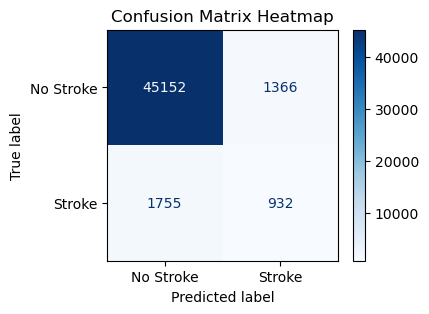

-------------------------------------------------------


Evaluating LGBMClassifier...

ROC AUC Score: 0.829

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     46518
           1       0.45      0.30      0.36      2687

    accuracy                           0.94     49205
   macro avg       0.71      0.64      0.66     49205
weighted avg       0.93      0.94      0.94     49205



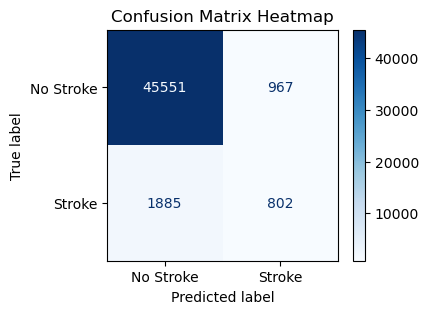

-------------------------------------------------------




In [37]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# List of tree-based models (Now using XGBoost and LightGBM)
tree_models = [
    XGBClassifier(random_state=0, n_estimators=200, learning_rate=0.1, max_depth=5),
    LGBMClassifier(random_state=0, n_estimators=200, learning_rate=0.1, max_depth=5)
]

# Train and evaluate tree-based models
print("\n🌲 Training Tree-Based Models:")
for model in tree_models:
    model.fit(X_train_tree, y_train_tree)
    print(f"Evaluating {model.__class__.__name__}...")
    evaluate_model_performance(model, X_test_tree, y_test)

## Linear Base Models


📈 Training Linear Models:
Evaluating LogisticRegression...

ROC AUC Score: 0.867

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.82      0.89     46518
           1       0.19      0.74      0.30      2687

    accuracy                           0.81     49205
   macro avg       0.59      0.78      0.60     49205
weighted avg       0.94      0.81      0.86     49205



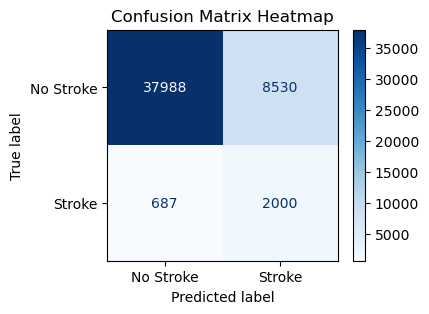

-------------------------------------------------------


Evaluating LinearSVC...

ROC AUC Score: 0.867

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97     46518
           1       0.42      0.49      0.45      2687

    accuracy                           0.93     49205
   macro avg       0.69      0.73      0.71     49205
weighted avg       0.94      0.93      0.94     49205



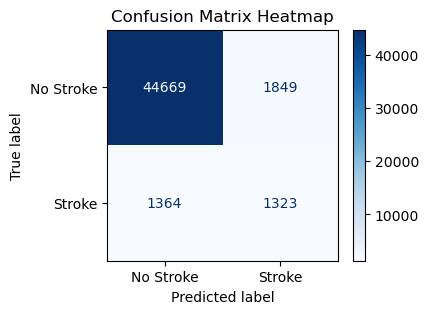

-------------------------------------------------------




In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

# List of linear models
linear_models = [
    LogisticRegression(max_iter=1000, random_state=0),
    LinearSVC(max_iter=100000, random_state=0)
]

# Train and evaluate linear models
print("\n📈 Training Linear Models:")
for model in linear_models:
    model.fit(X_train_linear, y_train_linear)
    print(f"Evaluating {model.__class__.__name__}...")
    evaluate_model_performance(model, X_test_linear, y_test)


## Tensorflow Base Model

Epoch 1/10


2025-02-23 12:27:27.814757: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


9304/9304 [==============================] - 3s 356us/step - loss: 0.4421 - accuracy: 0.7947 - val_loss: 0.5970 - val_accuracy: 0.6699
Epoch 2/10
9304/9304 [==============================] - 3s 369us/step - loss: 0.4364 - accuracy: 0.7981 - val_loss: 0.6634 - val_accuracy: 0.6370
Epoch 3/10
9304/9304 [==============================] - 3s 347us/step - loss: 0.4345 - accuracy: 0.7992 - val_loss: 0.6045 - val_accuracy: 0.6719
Epoch 4/10
9304/9304 [==============================] - 3s 342us/step - loss: 0.4333 - accuracy: 0.7998 - val_loss: 0.6196 - val_accuracy: 0.6602
Epoch 5/10
9304/9304 [==============================] - 3s 347us/step - loss: 0.4322 - accuracy: 0.8003 - val_loss: 0.6748 - val_accuracy: 0.6358
Epoch 6/10
9304/9304 [==============================] - 3s 348us/step - loss: 0.4312 - accuracy: 0.8006 - val_loss: 0.6411 - val_accuracy: 0.6456
Epoch 7/10
9304/9304 [==============================] - 3s 347us/step - loss: 0.4302 - accuracy: 0.8012 - val_loss: 0.6497 - val_accura

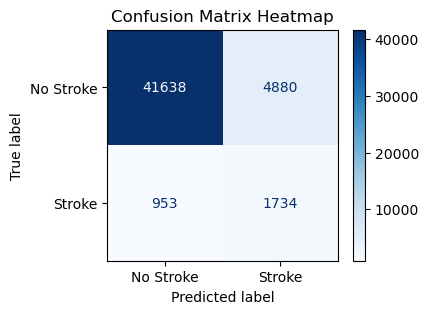

-------------------------------------------------------




In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define a TensorFlow model
def create_tensorflow_model(input_shape):
    model = Sequential([
        Input(shape=(input_shape,)),  # Explicit Input layer
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')  # Binary classification
    ])
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# Initialize and train the TensorFlow model
tensorflow_model = create_tensorflow_model(X_train_linear.shape[1])
tensorflow_model.fit(X_train_linear, y_train_linear, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the TensorFlow model
loss, accuracy = tensorflow_model.evaluate(X_test_linear, y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

evaluate_model_performance(tensorflow_model, X_test_linear, y_test)

### How I Will Try Improving Models in the Fine-Tuning Process:
1. **Hyperparameter Tuning**: Use GridSearchCV to optimize hyperparameters for each model.      
2. **Cross-Validation**: Use cross-validation (cross_val_score) to ensure robust evaluation and avoid overfitting to the train-test split.

3. **Ensemble Methods**: Combine multiple models using VotingClassifier or StackingClassifier to leverage the strengths of individual models.

4. **Feature Engineering**: Analyze and transform features to extract more predictive information (e.g., polynomial features, interactions, feature selection).

5. **Threshold Tuning**: Adjust the classification threshold for each model to balance precision and recall.

6. **Tensorflow Model**: Increase model capacity, experiment with layer types, optimize training, and regularization.

## Tuned XGBoost Model

Fitting 5 folds for each of 64 candidates, totalling 320 fits


/opt/anaconda3/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best parameters for XGBoost: {'colsample_bytree': 0.7, 'learning_rate': 0.018, 'max_depth': 2, 'min_child_weight': 3, 'n_estimators': 100, 'reg_alpha': 0.3, 'reg_lambda': 1.0, 'subsample': 0.75}
Best ROC AUC for XGBoost: 0.871

TEST DATA RESULTS

ROC AUC Score: 0.825

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.80      0.88     46518
           1       0.17      0.72      0.27      2687

    accuracy                           0.79     49205
   macro avg       0.57      0.76      0.58     49205
weighted avg       0.94      0.79      0.85     49205



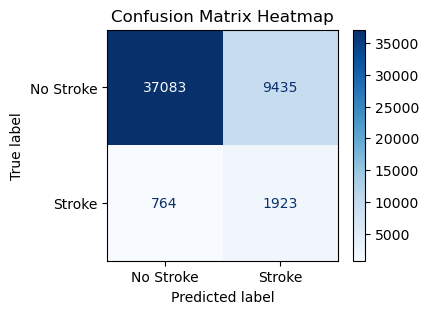

-------------------------------------------------------




In [54]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Compute class imbalance ratio for scale_pos_weight
class_weight = len(y_train_tree[y_train_tree == 0]) / len(y_train_tree[y_train_tree == 1])

param_grid_xgb = {
    'n_estimators': [90, 100],  # Slight increase for more boosting rounds
    'learning_rate': [0.016, 0.018],  # Slower learning to refine optimization
    'max_depth': [2],  # Keep shallow to prevent overfitting
    'subsample': [0.7, 0.75],  # Slightly reduce variance
    'colsample_bytree': [0.7],  # Keeping stable for feature sampling
    'min_child_weight': [3, 4],  # More flexibility for splits
    'reg_alpha': [0.2, 0.3],  # Slightly increase regularization for better feature selection
    'reg_lambda': [0.8, 1.0]  # Keep within range to balance weight decay
}

# Initialize XGBoost with class balancing
xgb = XGBClassifier(scale_pos_weight=class_weight, random_state=0)

# Use Stratified K-Folds for better validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

# Perform Grid Search for hyperparameter tuning
tuned_xgb = GridSearchCV(
    xgb, 
    param_grid_xgb, 
    scoring='roc_auc', 
    cv=skf,  # Use stratified K-Folds
    n_jobs=-1, 
    verbose=1  # Show progress
)

# Train the model with tuned parameters
tuned_xgb.fit(X_train_tree, y_train_tree)

# Print best parameters and performance
print("Best parameters for XGBoost:", tuned_xgb.best_params_)
print(f"Best ROC AUC for XGBoost: {tuned_xgb.best_score_:.3f}")

# Evaluate the model on test data
print("\nTEST DATA RESULTS")
evaluate_model_performance(tuned_xgb, X_test_tree, y_test)

## Tuned LightGBM Model

Best parameters for LightGBM: {'colsample_bytree': 0.55, 'learning_rate': 0.04, 'max_depth': 3, 'min_child_samples': 30, 'n_estimators': 90, 'reg_alpha': 0.3, 'reg_lambda': 1.2, 'subsample': 0.4}
Best ROC AUC for LightGBM: 0.906

TEST DATA RESULTS

ROC AUC Score: 0.822

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.82      0.89     46518
           1       0.18      0.68      0.28      2687

    accuracy                           0.81     49205
   macro avg       0.58      0.75      0.59     49205
weighted avg       0.93      0.81      0.86     49205



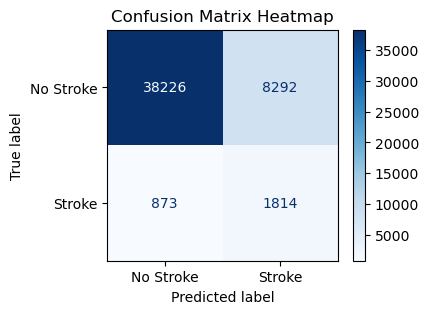

-------------------------------------------------------




In [60]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV
import gc

# Free up memory before running Grid Search
gc.collect()

param_tuned_lgb = {
    'n_estimators': [90],  # Slight reduction to prevent overfitting
    'learning_rate': [0.035, 0.04],  # Keeping stable
    'max_depth': [3],  # No deep trees for generalization
    'subsample': [0.4, 0.45],  # Slight increase for more variance
    'colsample_bytree': [0.55, 0.6],  # Increase feature diversity
    'reg_alpha': [0.3, 0.35],  # Reduce L1 regularization
    'reg_lambda': [1.2, 1.3],  # Reduce L2 regularization
    'min_child_samples': [30, 35]  # Keep stability in minimum samples per leaf
}

# Initialize model (Turn off LightGBM logs)
lgb = LGBMClassifier(random_state=0, n_jobs=-1, verbose=-1)

# Grid search with LightGBM (Silencing output)
tuned_lgb = GridSearchCV(
    lgb, 
    param_tuned_lgb, 
    scoring='roc_auc', 
    cv=5, 
    n_jobs=-1,  
    verbose=0  # Silence GridSearchCV output
)

# Train the model (WITHOUT early stopping, NO verbose logging)
tuned_lgb.fit(X_train_tree, y_train_tree)

# Print best parameters and performance
print("Best parameters for LightGBM:", tuned_lgb.best_params_)
print(f"Best ROC AUC for LightGBM: {tuned_lgb.best_score_:.3f}")

# **Manually refit best model WITHOUT logging output**
best_lgb = LGBMClassifier(**tuned_lgb.best_params_, random_state=0, n_jobs=-1, verbose=-1)

# Train best model normally (NO logging)
best_lgb.fit(X_train_tree, y_train_tree)

# Evaluate the final model
print("\nTEST DATA RESULTS")
evaluate_model_performance(best_lgb, X_test_tree, y_test)

## Tuned Logistic Regression Model

Best parameters for Logistic Regression: {'C': 0.01, 'l1_ratio': 0.8, 'max_iter': 1000, 'penalty': 'elasticnet', 'solver': 'saga'}
Best ROC AUC for Logistic Regression: 0.864

TEST DATA RESULTS

ROC AUC Score: 0.867

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.82      0.89     46518
           1       0.19      0.74      0.30      2687

    accuracy                           0.81     49205
   macro avg       0.59      0.78      0.60     49205
weighted avg       0.94      0.81      0.86     49205



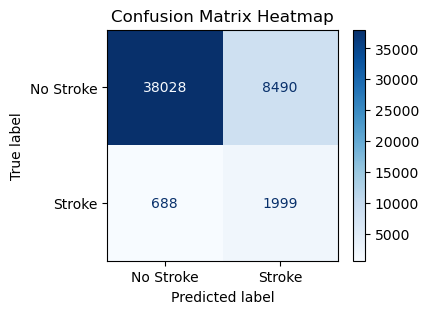

-------------------------------------------------------




In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define expanded parameter grid for Logistic Regression
param_tuned_lr = [
    {'C': [0.001, 0.01, 0.1, 1, 10], 'penalty': ['l1'], 'solver': ['liblinear'], 'max_iter': [1000]},  # L1: Only liblinear
    {'C': [0.001, 0.01, 0.1, 1, 10], 'penalty': ['l2'], 'solver': ['liblinear', 'lbfgs', 'saga', 'newton-cg'], 'max_iter': [1000]},  # L2: Supported by all
    {'C': [0.001, 0.01, 0.1, 1, 10], 'penalty': ['elasticnet'], 'solver': ['saga'], 'l1_ratio': [0.2, 0.5, 0.8], 'max_iter': [1000]}  # ElasticNet: Only saga
]

# Initialize model
lr = LogisticRegression(random_state=0, class_weight='balanced')

# Grid search
tuned_lr = GridSearchCV(lr, param_tuned_lr, scoring='roc_auc', cv=5, n_jobs=-1)
tuned_lr.fit(X_train_linear, y_train_linear)

print("Best parameters for Logistic Regression:", tuned_lr.best_params_)
print(f"Best ROC AUC for Logistic Regression: {tuned_lr.best_score_:.3f}")

# Evaluate the model
print("\nTEST DATA RESULTS")
evaluate_model_performance(tuned_lr, X_test_linear, y_test)

## Tuned SVM Model

Best parameters for Linear SVM: {'C': 1, 'dual': False, 'loss': 'squared_hinge'}
Best ROC AUC for Linear SVM: 0.863

TEST DATA RESULTS

ROC AUC Score: 0.867

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97     46518
           1       0.42      0.49      0.45      2687

    accuracy                           0.93     49205
   macro avg       0.69      0.73      0.71     49205
weighted avg       0.94      0.93      0.94     49205



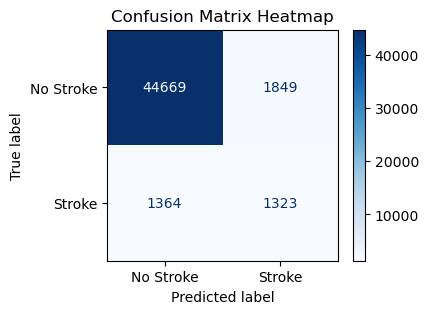

-------------------------------------------------------




In [43]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

# Expanded parameter grid
param_tuned_svm = {
    'C': [0.01, 0.1, 1],  # Remove extreme values (0.001 & 10)
    'loss': ['squared_hinge'],  # Keep only squared_hinge (better for large datasets)
    'dual': [False]  # Always False for squared_hinge
}


# Initialize model
svm = LinearSVC(max_iter=50000, random_state=0, class_weight='balanced')

# Grid search with cross-validation
tuned_svm = GridSearchCV(svm, param_tuned_svm, scoring='roc_auc', cv=5, n_jobs=-1)
tuned_svm.fit(X_train_linear, y_train_linear)

print("Best parameters for Linear SVM:", tuned_svm.best_params_)
print(f"Best ROC AUC for Linear SVM: {tuned_svm.best_score_:.3f}")

# Evaluate the model
print("\nTEST DATA RESULTS")
evaluate_model_performance(tuned_svm, X_test_linear, y_test)

## Tuned Tensorflow Model

Define a Hyperparameter Tuning Function.

In [48]:
import tensorflow as tf
from tensorflow import keras
import keras_tuner as kt

def build_model(hp):
    model = keras.Sequential()

    # Input Layer
    model.add(keras.layers.Input(shape=(X_train_linear.shape[1],)))

    # **Tune the number of layers** (between 2 and 3)
    for i in range(hp.Int('num_layers', 2, 3)):  
        model.add(keras.layers.Dense(
            units=hp.Int('units_' + str(i), min_value=64, max_value=256, step=64),  # Smaller range
            activation='relu'
        ))
        model.add(keras.layers.Dropout(hp.Float('dropout_rate_' + str(i), 0.1, 0.3, step=0.1)))  # Moderate dropout

    # Output Layer
    model.add(keras.layers.Dense(1, activation='sigmoid'))

    # **Stable Learning Rate**
    lr_schedule = keras.optimizers.schedules.ExponentialDecay(
        initial_learning_rate=hp.Choice('learning_rate', [0.0005, 0.001, 0.002]),
        decay_steps=500,
        decay_rate=0.90
    )

    # **Revert to Standard Binary Crossentropy (No Focal Loss)**
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=lr_schedule),
        loss='binary_crossentropy',  # ✅ Normal loss function for balanced training
        metrics=['accuracy']
    )

    return model

Perform Hyperparameter Tuning Using Keras Tuner

Reloading Tuner from keras_tuner_results/grid_tuned_nn/tuner0.json

Best Hyperparameters for TensorFlow Model:
num_layers : 1
units_0 : 32
dropout_rate_0 : 0.5
learning_rate : 0.1
Epoch 1/30
9304/9304 [==============================] - 3s 316us/step - loss: 0.5111 - accuracy: 0.7445 - val_loss: 0.6088 - val_accuracy: 0.6076
Epoch 2/30
9304/9304 [==============================] - 3s 307us/step - loss: 0.4941 - accuracy: 0.7532 - val_loss: 0.6701 - val_accuracy: 0.5762
Epoch 3/30
9304/9304 [==============================] - 3s 319us/step - loss: 0.4935 - accuracy: 0.7539 - val_loss: 0.6616 - val_accuracy: 0.5982
Epoch 4/30
9304/9304 [==============================] - 3s 307us/step - loss: 0.4923 - accuracy: 0.7547 - val_loss: 0.6616 - val_accuracy: 0.6045
Epoch 5/30
9304/9304 [==============================] - 3s 306us/step - loss: 0.4924 - accuracy: 0.7538 - val_loss: 0.6581 - val_accuracy: 0.6049
Epoch 6/30
1538/1538 [==============================] - 0s 212us/step - loss: 0.3570 - acc

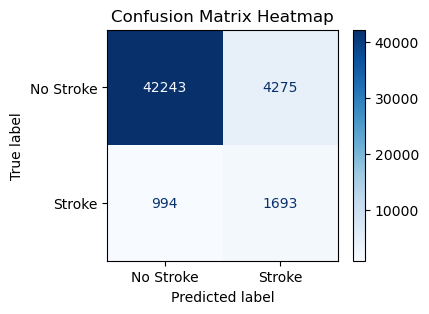

-------------------------------------------------------




In [49]:
from keras_tuner.tuners import GridSearch

# Initialize Keras Tuner
tuner = kt.GridSearch(
    build_model,
    objective='val_accuracy',
    max_trials=20,  # ✅ Keep a reasonable number of trials
    executions_per_trial=1,
    directory='keras_tuner_results',
    project_name='grid_tuned_nn'
)

# Reduce search epochs to prevent overfitting
tuner.search(X_train_linear, y_train_linear, epochs=5, validation_split=0.2, batch_size=32)

# Get best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print("\nBest Hyperparameters for TensorFlow Model:")
for param in best_hps.values:
    print(param, ":", best_hps.get(param))

# Build best model
best_model = tuner.hypermodel.build(best_hps)

# **Enable Early Stopping**
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# Train the best model
history = best_model.fit(
    X_train_linear, y_train_linear,
    epochs=30,  # ✅ Reduce epochs to avoid excessive training
    batch_size=32,  
    validation_split=0.2,
    verbose=1,
    callbacks=[early_stopping]  # ✅ Prevents overtraining
)

# Evaluate on test data
test_loss, test_acc = best_model.evaluate(X_test_linear, y_test)
print("\nTest Accuracy:", test_acc)

# Save model
best_model.save("best_grid_tuned_nn.h5")

# Evaluate performance
print("\nTEST DATA RESULTS")
evaluate_model_performance(best_model, X_test_linear, y_test)


Train the Best Model

Epoch 1/50
9304/9304 [==============================] - 3s 318us/step - loss: 0.5129 - accuracy: 0.7445 - val_loss: 0.5757 - val_accuracy: 0.6161
Epoch 2/50
9304/9304 [==============================] - 3s 319us/step - loss: 0.4916 - accuracy: 0.7521 - val_loss: 0.6611 - val_accuracy: 0.6568
Epoch 3/50
9304/9304 [==============================] - 3s 313us/step - loss: 0.4863 - accuracy: 0.7543 - val_loss: 0.6548 - val_accuracy: 0.6297
Epoch 4/50
9304/9304 [==============================] - 3s 314us/step - loss: 0.4856 - accuracy: 0.7541 - val_loss: 0.6567 - val_accuracy: 0.6296
Epoch 5/50
9304/9304 [==============================] - 3s 326us/step - loss: 0.4854 - accuracy: 0.7548 - val_loss: 0.6541 - val_accuracy: 0.6304
Epoch 6/50
9304/9304 [==============================] - 3s 310us/step - loss: 0.4855 - accuracy: 0.7547 - val_loss: 0.6542 - val_accuracy: 0.6302
Epoch 7/50
9304/9304 [==============================] - 3s 316us/step - loss: 0.4858 - accuracy: 0.7541 - val_loss: 0.6542 -

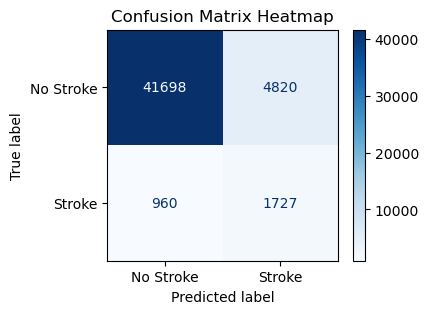

-------------------------------------------------------




In [50]:
# Build the best model with optimal hyperparameters
best_model = tuner.hypermodel.build(best_hps)

# Train the model
history = best_model.fit(
    X_train_linear, y_train_linear,
    epochs=50,  # Increased to 50 epochs
    batch_size=32,  # Keeps batch size at 32
    validation_split=0.2,  # 20% validation set
    verbose=1  # Displays training progress
)
# Evaluate on test data
test_loss, test_acc = best_model.evaluate(X_test_linear, y_test)
print("\nTest Accuracy:", test_acc)

# Save the best model
best_model.save("best_tuned_nn.h5")

print("\nTEST DATA RESULTS")
evaluate_model_performance(best_model, X_test_linear, y_test)

# <span style="color:#5E6997">Conclusion</span> <a class="anchor" id="conclusion"></a>